# Scripting IST 652 HOMEWORK

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from IPython.display import display
from scipy.stats.mstats import winsorize

/Users/USER/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
class DataPreProcessingAndEDA:
    """
    Class for preprocessing and performing exploratory data analysis on pandas DataFrames.
    Includes methods for data description, cleaning, and visualization.
    """

    @staticmethod
    def df_description(df):
        """
        Prints the shape and data types of the DataFrame.
        """
        print('Shape:', df.shape)
        print('Data types:', '\n', df.dtypes)

    @staticmethod
    def convert_col_names_to_lower_case(df):
        """
        Converts DataFrame column names to lower case.
        """
        return df.rename(columns={col: col.lower() for col in df.columns})

    @staticmethod
    def describe_data(df):
        """
        Displays descriptive statistics of DataFrame.
        """
        display(df.describe(include='all'))

    @staticmethod
    def data_info(df):
        """
        Displays information about DataFrame.
        """
        df.info(verbose=True, show_counts=True)

    @staticmethod
    def nulls_in_data(df):
        """
        Prints the number of nulls in each column of the DataFrame.
        """
        print(df.isnull().sum())

    @staticmethod
    def duplicate_rows_at_primary_key_level(df, level_of_the_data):
        """
        Identifies and prints duplicate rows based on the specified primary key columns.
        """
        duplicates = df[df.duplicated(subset=level_of_the_data, keep=False)]
        if duplicates.shape[0] > 0:
            print("DataFrame has duplicates, total rows with duplicates:", duplicates.shape[0])
        else:
            print("No duplicates in data")
        return duplicates

    @staticmethod
    def percentage_nulls_in_each_col(df):
        """
        Displays the percentage of nulls in each column of the DataFrame.
        """
        na_count = df.isna().sum()
        na_percent = (na_count / df.shape[0] * 100).apply("{:.2f}%".format)
        NA = pd.DataFrame({'NA Count': na_count, 'NA Percent': na_percent, 'Dtypes': df.dtypes})
        display(NA)

    @staticmethod
    def drop_cols(df, column_list_to_drop):
        """
        Drops specified columns from the DataFrame.
        """
        return df.drop(columns=column_list_to_drop)

    @staticmethod
    def df_columns_and_dtypes_into_list(df):
        """
        Returns a dictionary of DataFrame columns and their respective data types.
        """
        return dict(zip(df.columns, map(str, df.dtypes)))

    @staticmethod
    def unique_entries_count_each_column(df):
        """
        Returns a dictionary with column names as keys and the number of unique entries as values.
        """
        return {col: df[col].nunique() for col in df.columns}


    
    @staticmethod
    def value_counts_by_column(df, column_name):
        """
        Returns the counts of unique values for the specified column using value_counts().
        """
        return df[column_name].value_counts()


    @staticmethod
    def convert_column_to_string(df, column_name):
        """
        Converts the specified column to string type.
        """
        df[column_name] = df[column_name].astype(str)
        return df

    @staticmethod
    def convert_column_to_numeric(df, column_name, numeric_type='float64'):
        """
        Converts the specified column to a numeric type (int64 or float64).
        """
        if numeric_type == 'int64':
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce').fillna(0).astype('int64')
        else:
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce').fillna(0.0).astype('float64')
        return df

    @staticmethod
    def check_distribution(df):
        """
        Checks the distribution of numerical columns by calculating skewness and kurtosis, and plotting histograms.
        """
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns
        results = []

        for col in num_cols:
            skewness = skew(df[col].dropna())
            kurt = kurtosis(df[col].dropna())
            results.append({'Variable': col, 'Skewness': skewness, 'Kurtosis': kurt})

            plt.figure(figsize=(10, 6))
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

        return pd.DataFrame(results)

    @staticmethod
    def outlier_report(df):
        """
        Generates a report of potential and definite outliers in numerical columns based on Z-scores.
        """
        report = []
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns

        for col in num_cols:
            zs = zscore(df[col].dropna())
            possible_outliers = ((zs >= 2) & (zs < 3)).sum()
            definite_outliers = (zs >= 3).sum()
            report.append({
                'Numerical Variable': col,
                'Possible Outliers': possible_outliers,
                'Definite Outliers': definite_outliers,
                'Total Outliers': possible_outliers + definite_outliers
            })

        return pd.DataFrame(report)

    @staticmethod
    def analyze_freight_cost_distribution(df, x_var):
        """
        Analyzes and visualizes the distribution of 'freight cost (usd)' across categories of 'x_var'.
        """
        df['freight cost (usd)'] = pd.to_numeric(df['freight cost (usd)'], errors='coerce')
        valid_data = df.dropna(subset=['freight cost (usd)', x_var])

        plt.figure(figsize=(20, 10))
        sns.boxplot(x=x_var, y='freight cost (usd)', data=valid_data)
        plt.title(f'Distribution of Freight Cost (USD) by {x_var}')
        plt.xlabel(x_var)
        plt.ylabel('Freight Cost (USD)')
        plt.show()

        return valid_data.groupby(x_var)['freight cost (usd)'].describe()

    @staticmethod
    def plot_and_analyze_data(df, x_var):
        """
        Plots data and analyzes correlation between 'x_var' and 'freight cost (usd)'.
        """
        df['freight cost (usd)'] = pd.to_numeric(df['freight cost (usd)'], errors='coerce')
        df = df.dropna(subset=[x_var, 'freight cost (usd)'])

        if df[x_var].dtype in [np.float64, np.int64]:
            sns.boxplot(x=df[x_var])
            plt.show()

        sns.lmplot(x=x_var, y='freight cost (usd)', data=df)
        plt.show()

        return df[x_var].corr(df['freight cost (usd)'])

    @staticmethod
    def winsorize_dataframe(df, limits=(0.01, 0.01)):
        """
        Applies winsorization to all numerical columns in the DataFrame to limit extreme values.
        """
        winsorized_df = df.copy()
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

        for col in numerical_cols:
            winsorized_df[col] = winsorize(df[col], limits=limits)

        return winsorized_df
    
    @staticmethod
    def convert_column_to_date(df, column_name, date_format=None):
        """
        Converts the specified column to datetime type. Optionally, a specific date_format can be provided.
        """
        df[column_name] = pd.to_datetime(df[column_name], format=date_format, errors='coerce')
        return df


# **`Loading, Reading and Cleaning the Dataset`**

In [3]:
df = pd.read_csv("/Users/USER/Downloads/Supply_Chain_Shipment_Pricing_Dataset_20240325.csv")

In [4]:
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [5]:
eda = DataPreProcessingAndEDA()

In [6]:
eda.data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

**Insight**: From df.info() we can see that there are null values in the following columns - shipment mode, dosage, line item insurance.

In [7]:
eda.percentage_nulls_in_each_col(df)

,NA Count,NA Percent,Dtypes
id,0,0.00%,int64
project code,0,0.00%,object
pq #,0,0.00%,object
po / so #,0,0.00%,object
asn/dn #,0,0.00%,object
country,0,0.00%,object
managed by,0,0.00%,object
fulfill via,0,0.00%,object
vendor inco term,0,0.00%,object
shipment mode,360,3.49%,object


In [8]:
eda.df_description(df)

Shape: (10324, 33)
Data types: 
 id                                int64
project code                     object
pq #                             object
po / so #                        object
asn/dn #                         object
country                          object
managed by                       object
fulfill via                      object
vendor inco term                 object
shipment mode                    object
pq first sent to client date     object
po sent to vendor date           object
scheduled delivery date          object
delivered to client date         object
delivery recorded date           object
product group                    object
sub classification               object
vendor                           object
item description                 object
molecule/test type               object
brand                            object
dosage                           object
dosage form                      object
unit of measure (per pack)        int64
line it

In [9]:
eda.describe_data(df)

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",True,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


In [10]:
eda.nulls_in_data(df)

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

In [11]:
eda.df_columns_and_dtypes_into_list(df)

{'id': 'int64',
 'project code': 'object',
 'pq #': 'object',
 'po / so #': 'object',
 'asn/dn #': 'object',
 'country': 'object',
 'managed by': 'object',
 'fulfill via': 'object',
 'vendor inco term': 'object',
 'shipment mode': 'object',
 'pq first sent to client date': 'object',
 'po sent to vendor date': 'object',
 'scheduled delivery date': 'object',
 'delivered to client date': 'object',
 'delivery recorded date': 'object',
 'product group': 'object',
 'sub classification': 'object',
 'vendor': 'object',
 'item description': 'object',
 'molecule/test type': 'object',
 'brand': 'object',
 'dosage': 'object',
 'dosage form': 'object',
 'unit of measure (per pack)': 'int64',
 'line item quantity': 'int64',
 'line item value': 'float64',
 'pack price': 'float64',
 'unit price': 'float64',
 'manufacturing site': 'object',
 'first line designation': 'bool',
 'weight (kilograms)': 'object',
 'freight cost (usd)': 'object',
 'line item insurance (usd)': 'float64'}

In [12]:
eda.duplicate_rows_at_primary_key_level(df, 'id')

No duplicates in data


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)


In [13]:
eda.value_counts_by_column(df, 'fulfill via')
#Example

fulfill via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

In [14]:
eda.unique_entries_count_each_column(df)

{'id': 10324,
 'project code': 142,
 'pq #': 1237,
 'po / so #': 6233,
 'asn/dn #': 7030,
 'country': 43,
 'managed by': 4,
 'fulfill via': 2,
 'vendor inco term': 8,
 'shipment mode': 4,
 'pq first sent to client date': 765,
 'po sent to vendor date': 897,
 'scheduled delivery date': 2006,
 'delivered to client date': 2093,
 'delivery recorded date': 2042,
 'product group': 5,
 'sub classification': 6,
 'vendor': 73,
 'item description': 184,
 'molecule/test type': 86,
 'brand': 48,
 'dosage': 54,
 'dosage form': 17,
 'unit of measure (per pack)': 31,
 'line item quantity': 5065,
 'line item value': 8741,
 'pack price': 1175,
 'unit price': 183,
 'manufacturing site': 88,
 'first line designation': 2,
 'weight (kilograms)': 4688,
 'freight cost (usd)': 6733,
 'line item insurance (usd)': 6722}

In [15]:
eda.value_counts_by_column(df, 'project code')
#This column's datatype need not be converted to any other format. 

project code
116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
             ... 
A02-SN-T50      1
103-UG-T30      1
136-RW-T01      1
100-SN-T01      1
104-SZ-T30      1
Name: count, Length: 142, dtype: int64

In [16]:
eda.value_counts_by_column(df, 'pq #')
#No need to convert

pq #
Pre-PQ Process    2681
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
                  ... 
FPQ-12933            1
FPQ-6823             1
FPQ-15736            1
FPQ-6128             1
FPQ-16523            1
Name: count, Length: 1237, dtype: int64

In [17]:
eda.value_counts_by_column(df, 'po / so #')
#No need to convert

po / so #
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-259075    38
SCMS-215370    38
               ..
SCMS-149030     1
SCMS-234070     1
SCMS-101010     1
SCMS-56180      1
SO-51680        1
Name: count, Length: 6233, dtype: int64

In [18]:
eda.value_counts_by_column(df, 'asn/dn #')
#No need to convert

asn/dn #
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28036    17
             ..
ASN-19497     1
ASN-24569     1
ASN-10872     1
ASN-29128     1
DN-4334       1
Name: count, Length: 7030, dtype: int64

In [19]:
eda.value_counts_by_column(df, 'country')
#No need to convert

country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                

In [20]:
eda.value_counts_by_column(df, 'managed by')

managed by
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

In [21]:
eda.value_counts_by_column(df, 'fulfill via')

fulfill via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

In [22]:
eda.value_counts_by_column(df, 'vendor inco term')
#Need to change acronyms

vendor inco term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

In [23]:
eda.value_counts_by_column(df, 'shipment mode')
#no need to convert datatype

shipment mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

In [24]:
eda.value_counts_by_column(df, 'pq first sent to client date')
#Need to convert to date

pq first sent to client date
Pre-PQ Process       2476
9/11/2014             205
Date Not Captured     205
7/11/2013             173
4/30/2014             123
                     ... 
7/29/2010               1
10/3/2011               1
12/17/2013              1
2/5/2015                1
8/29/2013               1
Name: count, Length: 765, dtype: int64

In [25]:
eda.value_counts_by_column(df, 'po sent to vendor date')
#need to convert to date

po sent to vendor date
N/A - From RDC       5404
Date Not Captured     328
8/27/2014              80
3/19/2010              78
8/29/2014              76
                     ... 
4/20/2012               1
8/27/2007               1
10/2/2007               1
3/21/2008               1
8/29/2012               1
Name: count, Length: 897, dtype: int64

In [26]:
eda.value_counts_by_column(df, 'scheduled delivery date')
#need to convert to date

scheduled delivery date
29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
             ..
2-Feb-10      1
29-Jan-15     1
9-Sep-10      1
4-Apr-15      1
9-Sep-15      1
Name: count, Length: 2006, dtype: int64

In [27]:
eda.value_counts_by_column(df, 'delivered to client date')
#need to convert to date

delivered to client date
29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
             ..
23-Mar-11     1
1-Nov-14      1
31-Mar-14     1
28-Sep-12     1
16-Apr-15     1
Name: count, Length: 2093, dtype: int64

In [28]:
eda.value_counts_by_column(df, 'delivery recorded date')
#need to convert to date

delivery recorded date
29-Aug-14    67
27-Aug-14    66
14-Feb-12    60
28-Jun-10    60
16-Apr-13    59
             ..
16-Apr-11     1
10-Aug-12     1
31-Aug-10     1
23-Mar-11     1
8-May-15      1
Name: count, Length: 2042, dtype: int64

In [29]:
eda.value_counts_by_column(df, 'product group')
#no need to convert but should find acronyms

product group
ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

In [30]:
eda.value_counts_by_column(df, 'sub classification')
#no need to convert

sub classification
Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

In [31]:
eda.value_counts_by_column(df, 'vendor')
#no need to convert

vendor
SCMS from RDC                                   5404
Orgenics, Ltd                                    754
S. BUYS WHOLESALER                               715
Aurobindo Pharma Limited                         668
Trinity Biotech, Plc                             356
                                                ... 
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)       1
OMEGA DIAGNOSTICS LTD                              1
PLURIPHARM S.A.                                    1
CENTRAL PHARMACEUTICAL COMPANY NO. 1               1
AUROBINDO PHARAM (SOUTH AFRICA)                    1
Name: count, Length: 73, dtype: int64

In [32]:
eda.value_counts_by_column(df, 'item description')
#no need to convert

item description
Efavirenz 600mg, tablets, 30 Tabs                                                755
Nevirapine 200mg, tablets, 60 Tabs                                               623
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                597
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   577
                                                                                ... 
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs      1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                       1
Malaria Antigen P.f Kit, 30 x 1 Test                                               1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml      1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                              1
Name: count, Length: 184, dtype: int64

In [33]:
eda.value_counts_by_column(df, 'molecule/test type')
#no need to convert

molecule/test type
Efavirenz                           1125
Nevirapine                           877
Lamivudine/Nevirapine/Zidovudine     707
Lamivudine/Zidovudine                689
Lopinavir/Ritonavir                  633
                                    ... 
Mefloquine (as hydrochloride)          1
Quinine (as sulfate)                   1
Primaquine base (as diphosphate)       1
Lamivudine/Zidovudine+Abacavir         1
Nelfinavir                             1
Name: count, Length: 86, dtype: int64

In [34]:
eda.value_counts_by_column(df, 'brand')
#no need to convert

brand
Generic            7285
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             165
Norvir              136
Stat-Pak            115
Bioline             113
Truvada              94
Videx                84
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             53
Viread               52
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb

In [35]:
eda.value_counts_by_column(df, 'dosage')
#no need to convert

dosage
300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
100/25mg            73
60/30mg             73
600/300mg           63
300/100mg           54
1mg/ml              54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
80mg/ml             13
500/25mg            13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
150/

In [36]:
eda.value_counts_by_column(df, 'dosage form')

dosage form
Tablet                                3532
Tablet - FDC                          2749
Test kit                              1575
Capsule                                729
Oral solution                          727
Chewable/dispersible tablet - FDC      239
Oral suspension                        214
Test kit - Ancillary                   161
Chewable/dispersible tablet            146
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: count, dtype: int64

In [37]:
eda.value_counts_by_column(df, 'unit of measure (per pack)')
#no need to convert

unit of measure (per pack)
60      4121
30      2630
100      976
240      670
120      474
20       470
90       222
300      157
1        126
25       114
200       76
180       76
270       53
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: count, dtype: int64

In [38]:
eda.value_counts_by_column(df, 'line item quantity')
#no need to convert

line item quantity
10000     93
1000      91
100       87
2000      73
5000      69
          ..
11507      1
37         1
6821       1
137130     1
36639      1
Name: count, Length: 5065, dtype: int64

In [39]:
eda.value_counts_by_column(df, 'line item value')
#no need to convert

line item value
200000.00    29
16000.00     23
800.00       18
0.00         17
14400.00     16
             ..
561.46        1
438340.92     1
2604.00       1
1624.98       1
72911.61      1
Name: count, Length: 8741, dtype: int64

In [40]:
eda.value_counts_by_column(df, 'pack price')
#no need to convert

pack price
32.00    368
80.00    307
89.00    183
11.22    139
20.00    110
        ... 
77.93      1
97.30      1
3.27       1
10.40      1
1.38       1
Name: count, Length: 1175, dtype: int64

In [41]:
eda.value_counts_by_column(df, 'unit price')
#no need to convert

unit price
0.04     713
0.01     492
0.12     464
0.14     444
0.80     411
        ... 
3.25       1
1.21       1
1.80       1
1.48       1
26.91      1
Name: count, Length: 183, dtype: int64

In [42]:
eda.value_counts_by_column(df, 'manufacturing site')
#no need to convert

manufacturing site
Aurobindo Unit III, India              3172
Mylan (formerly Matrix) Nashik         1415
Hetero Unit III Hyderabad IN            869
Cipla, Goa, India                       665
Strides, Bangalore, India.              540
                                       ... 
BUNDI INTERNATIONAL DIAGNOSTICS LTD       1
Remedica, Limassol, Cyprus                1
OMEGA Diagnostics, UK                     1
ABBSP                                     1
Medochemie Factory A, CY                  1
Name: count, Length: 88, dtype: int64

In [43]:
eda.value_counts_by_column(df, 'first line designation')

first line designation
True     7030
False    3294
Name: count, dtype: int64

In [44]:
eda.value_counts_by_column(df, 'weight (kilograms)')
#should convert

weight (kilograms)
Weight Captured Separately    1507
2                               29
6                               26
1                               23
5                               20
                              ... 
1727                             1
4038                             1
1930                             1
4382                             1
1392                             1
Name: count, Length: 4688, dtype: int64

In [45]:
eda.value_counts_by_column(df, 'freight cost (usd)')
#should convert

freight cost (usd)
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
                                      ... 
12793.7                                  1
35499.58                                 1
1949.64                                  1
569.11                                   1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6733, dtype: int64

In [46]:
eda.value_counts_by_column(df, 'line item insurance (usd)')
#no need to convert

line item insurance (usd)
0.00      54
0.02      37
0.07      33
0.05      30
0.06      30
          ..
381.78     1
858.86     1
332.18     1
222.58     1
85.82      1
Name: count, Length: 6722, dtype: int64

**`Insights`**: In the above lines of code, we have found information on the characteristics of our dataset, found out information about null values, about duplicates in our dataset, about count of unique values and other basic information about the data. In the following lines of code, we will be changing data types, replacing acronyms wherever needed, and dropping unnecessary columns. 

**Changing Datatypes**

In [47]:
eda.convert_column_to_numeric(df, 'weight (kilograms)', numeric_type='float64')

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,0.0,See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,0.0,See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,0.0,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392.0,Freight Included in Commodity Cost,134.03


In [48]:
eda.convert_column_to_numeric(df, 'freight cost (usd)', numeric_type='float64')

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,0.0,0.00,705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,0.0,0.00,161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,0.0,0.00,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392.0,0.00,134.03


In [49]:
eda.df_columns_and_dtypes_into_list(df)

{'id': 'int64',
 'project code': 'object',
 'pq #': 'object',
 'po / so #': 'object',
 'asn/dn #': 'object',
 'country': 'object',
 'managed by': 'object',
 'fulfill via': 'object',
 'vendor inco term': 'object',
 'shipment mode': 'object',
 'pq first sent to client date': 'object',
 'po sent to vendor date': 'object',
 'scheduled delivery date': 'object',
 'delivered to client date': 'object',
 'delivery recorded date': 'object',
 'product group': 'object',
 'sub classification': 'object',
 'vendor': 'object',
 'item description': 'object',
 'molecule/test type': 'object',
 'brand': 'object',
 'dosage': 'object',
 'dosage form': 'object',
 'unit of measure (per pack)': 'int64',
 'line item quantity': 'int64',
 'line item value': 'float64',
 'pack price': 'float64',
 'unit price': 'float64',
 'manufacturing site': 'object',
 'first line designation': 'bool',
 'weight (kilograms)': 'float64',
 'freight cost (usd)': 'float64',
 'line item insurance (usd)': 'float64'}

In [50]:
eda.convert_column_to_date(df,'scheduled delivery date')

/var/folders/mr/4w3lkmc569gb6d_f2kbs910r0000gn/T/ipykernel_59250/2350971799.py:211: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column_name] = pd.to_datetime(df[column_name], format=date_format, errors='coerce')


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,0.0,0.00,705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,0.0,0.00,161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,0.0,0.00,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392.0,0.00,134.03


In [51]:
eda.convert_column_to_date(df,'scheduled delivery date')

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,0.0,0.00,705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,0.0,0.00,161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,0.0,0.00,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392.0,0.00,134.03


In [52]:
eda.convert_column_to_date(df,'delivered to client date')

/var/folders/mr/4w3lkmc569gb6d_f2kbs910r0000gn/T/ipykernel_59250/2350971799.py:211: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column_name] = pd.to_datetime(df[column_name], format=date_format, errors='coerce')


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,0.0,0.00,705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,0.0,0.00,161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,0.0,0.00,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392.0,0.00,134.03


In [53]:
eda.convert_column_to_date(df,'delivery recorded date')

/var/folders/mr/4w3lkmc569gb6d_f2kbs910r0000gn/T/ipykernel_59250/2350971799.py:211: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column_name] = pd.to_datetime(df[column_name], format=date_format, errors='coerce')


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13.0,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358.0,4521.50,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171.0,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855.0,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590.0,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,0.0,0.00,705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,0.0,0.00,161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,0.0,0.00,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392.0,0.00,134.03


In [54]:
eda.df_columns_and_dtypes_into_list(df)

{'id': 'int64',
 'project code': 'object',
 'pq #': 'object',
 'po / so #': 'object',
 'asn/dn #': 'object',
 'country': 'object',
 'managed by': 'object',
 'fulfill via': 'object',
 'vendor inco term': 'object',
 'shipment mode': 'object',
 'pq first sent to client date': 'object',
 'po sent to vendor date': 'object',
 'scheduled delivery date': 'datetime64[ns]',
 'delivered to client date': 'datetime64[ns]',
 'delivery recorded date': 'datetime64[ns]',
 'product group': 'object',
 'sub classification': 'object',
 'vendor': 'object',
 'item description': 'object',
 'molecule/test type': 'object',
 'brand': 'object',
 'dosage': 'object',
 'dosage form': 'object',
 'unit of measure (per pack)': 'int64',
 'line item quantity': 'int64',
 'line item value': 'float64',
 'pack price': 'float64',
 'unit price': 'float64',
 'manufacturing site': 'object',
 'first line designation': 'bool',
 'weight (kilograms)': 'float64',
 'freight cost (usd)': 'float64',
 'line item insurance (usd)': 'float6

In [55]:
eda.nulls_in_data(df)

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

In [56]:
eda.value_counts_by_column(df, 'delivered to client date')

delivered to client date
2014-08-29    74
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
              ..
2011-03-23     1
2014-11-01     1
2014-03-31     1
2012-09-28     1
2015-04-16     1
Name: count, Length: 2093, dtype: int64

In [57]:
eda.value_counts_by_column(df, 'scheduled delivery date')

scheduled delivery date
2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
              ..
2010-02-02     1
2015-01-29     1
2010-09-09     1
2015-04-04     1
2015-09-09     1
Name: count, Length: 2006, dtype: int64

In [58]:
eda.value_counts_by_column(df, 'delivery recorded date')

delivery recorded date
2014-08-29    67
2014-08-27    66
2012-02-14    60
2010-06-28    60
2013-04-16    59
              ..
2011-04-16     1
2012-08-10     1
2010-08-31     1
2011-03-23     1
2015-05-08     1
Name: count, Length: 2042, dtype: int64

**Insights**: We have now converted the data types and have cross checked if the value counts have changed and we are good to go. In the next steps, we will remove the columns we dont need.

**`Removing unnecessary columns`** 
We will be removing the following columns as they would not be interesting to us from a research question perspective. 
1) project code
2) pq#
3) po / so #
4) asn/dn #
5) pq first sent to client date
6) po sent to vendor date
7) dosage

In [59]:
column_list_to_drop = ['project code', 'pq #', 'po / so #', 'asn/dn #', 'pq first sent to client date',
                       'po sent to vendor date', 'dosage']
df = eda.drop_cols(df, column_list_to_drop)

In [60]:
eda.df_columns_and_dtypes_into_list(df)

{'id': 'int64',
 'country': 'object',
 'managed by': 'object',
 'fulfill via': 'object',
 'vendor inco term': 'object',
 'shipment mode': 'object',
 'scheduled delivery date': 'datetime64[ns]',
 'delivered to client date': 'datetime64[ns]',
 'delivery recorded date': 'datetime64[ns]',
 'product group': 'object',
 'sub classification': 'object',
 'vendor': 'object',
 'item description': 'object',
 'molecule/test type': 'object',
 'brand': 'object',
 'dosage form': 'object',
 'unit of measure (per pack)': 'int64',
 'line item quantity': 'int64',
 'line item value': 'float64',
 'pack price': 'float64',
 'unit price': 'float64',
 'manufacturing site': 'object',
 'first line designation': 'bool',
 'weight (kilograms)': 'float64',
 'freight cost (usd)': 'float64',
 'line item insurance (usd)': 'float64'}

**Insights**: In the above lines of code, we have removed the columns that we would not be using. 
Reasoning: Having id and columns like project code, pq#, po / so #, asn/dn # which are like secondary keys made no sense to us as we did not feel they would not affect cost much considering how many unique values each of them had. 
The columns pq first sent to client date and po sent to vendor date got more to do with order placements, rather than being the ones driving cost - and the data in the columns seemed incomplete as it had a lot of invalid date entries like not available, hence we decided to drop them. Additionally, we were focussed more on operational and logistical insights rather than clinical insights hence we decided to drop dosage too. In the next lines of code, we will be replacing some acronyms with what they actually mean for better understanding and ease of access considering these terms would not be known by all.

**`Dealing with abbreviations`**
We will change the abbreviations for two columns - vendor inco group and product group into their elaborated names.

In [61]:
eda.value_counts_by_column(df, 'product group')

product group
ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

From research across the internet, we found out the following elaborations
1) ACT: Artemisinin-based Combination Therapy
2) ANTM: Anti-malarial medicine
3) ARV: Anti-Retroviral Treatment
4) HRDT: HIV Rapid Diagnostic Test
5) MRDT: Malarial Rapid Diagnostic Test

In [62]:
abbreviations = {
    'ACT': 'Artemisinin-based Combination Therapy',
    'ANTM': 'Anti-malarial medicine',
    'ARV': 'Anti-Retroviral Treatment',
    'HRDT': 'HIV Rapid Diagnostic Test',
    'MRDT': 'Malarial Rapid Diagnostic Test'
}
df['product group'] = df['product group'].replace(abbreviations)

In [63]:
eda.value_counts_by_column(df, 'product group')

product group
Anti-Retroviral Treatment                8550
HIV Rapid Diagnostic Test                1728
Anti-malarial medicine                     22
Artemisinin-based Combination Therapy      16
Malarial Rapid Diagnostic Test              8
Name: count, dtype: int64

In [64]:
eda.value_counts_by_column(df, 'vendor inco term')

vendor inco term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

**Insights**: The column vendor inco terms contains Incoterms ® or International Commercial Terms, which are the common language of international trade. Established by the International Chamber of Commerce (ICC), they are standard terms which are commonly incorporated into contracts for the trade of goods around the world. We will replace their abbreviations with their elaborations.

In [65]:
abbreviations1 = {
    'EXW': 'Ex Works',
    'FCA': 'Free Carrier',
    'CIP': 'Carriage and Insurance Paid To',
    'DAP': 'Delivery at Place',
    'DDU': 'Delivery at Place Unloaded',
    'DDP': 'Delivery Duty Paid',
    'CIF': 'Cost, Insurance and Freight',
    'N/A - From RDC': 'From Regional Distribution Center'
}
df['vendor inco term'] = df['vendor inco term'].replace(abbreviations1)

In [66]:
eda.value_counts_by_column(df, 'vendor inco term')

vendor inco term
From Regional Distribution Center    5404
Ex Works                             2778
Delivery Duty Paid                   1443
Free Carrier                          397
Carriage and Insurance Paid To        275
Delivery at Place Unloaded             15
Delivery at Place                       9
Cost, Insurance and Freight             3
Name: count, dtype: int64

**Insight**: We have now changed the abbreviations to their elaborated forms. In the next steps, we will handle missing values. 

# **`Handling Missing Values`**

In [67]:
eda.nulls_in_data(df)

id                              0
country                         0
managed by                      0
fulfill via                     0
vendor inco term                0
shipment mode                 360
scheduled delivery date         0
delivered to client date        0
delivery recorded date          0
product group                   0
sub classification              0
vendor                          0
item description                0
molecule/test type              0
brand                           0
dosage form                     0
unit of measure (per pack)      0
line item quantity              0
line item value                 0
pack price                      0
unit price                      0
manufacturing site              0
first line designation          0
weight (kilograms)              0
freight cost (usd)              0
line item insurance (usd)     287
dtype: int64


In [68]:
eda.percentage_nulls_in_each_col(df)

,NA Count,NA Percent,Dtypes
id,0,0.00%,int64
country,0,0.00%,object
managed by,0,0.00%,object
fulfill via,0,0.00%,object
vendor inco term,0,0.00%,object
shipment mode,360,3.49%,object
scheduled delivery date,0,0.00%,datetime64[ns]
delivered to client date,0,0.00%,datetime64[ns]
delivery recorded date,0,0.00%,datetime64[ns]
product group,0,0.00%,object


## **Handling Missing Values by Imputing Insurance Column**

We have null values in two columns - 1) line item insurance (usd) - a numerical column for which we will be using KNN Imputer. 2) shipment mode - a categorical variable for which we will one hot encode it and then use KNN Imputer. 

In [69]:
KNN_Imputer = KNNImputer(n_neighbors=5, weights='uniform')
columns_to_impute = ['line item insurance (usd)']
imputed_data = KNN_Imputer.fit_transform(df[columns_to_impute])
df[columns_to_impute] = imputed_data

In [70]:
df['line item insurance (usd)'].describe()

count    10324.000000
mean       240.117626
std        493.188408
min          0.000000
25%          7.030000
50%         52.940000
75%        241.750000
max       7708.440000
Name: line item insurance (usd), dtype: float64

In [71]:
eda.percentage_nulls_in_each_col(df)

,NA Count,NA Percent,Dtypes
id,0,0.00%,int64
country,0,0.00%,object
managed by,0,0.00%,object
fulfill via,0,0.00%,object
vendor inco term,0,0.00%,object
shipment mode,360,3.49%,object
scheduled delivery date,0,0.00%,datetime64[ns]
delivered to client date,0,0.00%,datetime64[ns]
delivery recorded date,0,0.00%,datetime64[ns]
product group,0,0.00%,object


**`Handling nulls and imputing shipment mode - a categorical variable`**

In [72]:
df[['shipment mode']] = df[['shipment mode']].fillna('Unavailable')

In [73]:
eda.percentage_nulls_in_each_col(df)

,NA Count,NA Percent,Dtypes
id,0,0.00%,int64
country,0,0.00%,object
managed by,0,0.00%,object
fulfill via,0,0.00%,object
vendor inco term,0,0.00%,object
shipment mode,0,0.00%,object
scheduled delivery date,0,0.00%,datetime64[ns]
delivered to client date,0,0.00%,datetime64[ns]
delivery recorded date,0,0.00%,datetime64[ns]
product group,0,0.00%,object


**Insights**: In the above lines of code, we have handled missing values by replacing them with the term 'unavailable'. We will now do a preliminary set of EDA without handling outliers. 

### Initial EDA without outlier handling ###

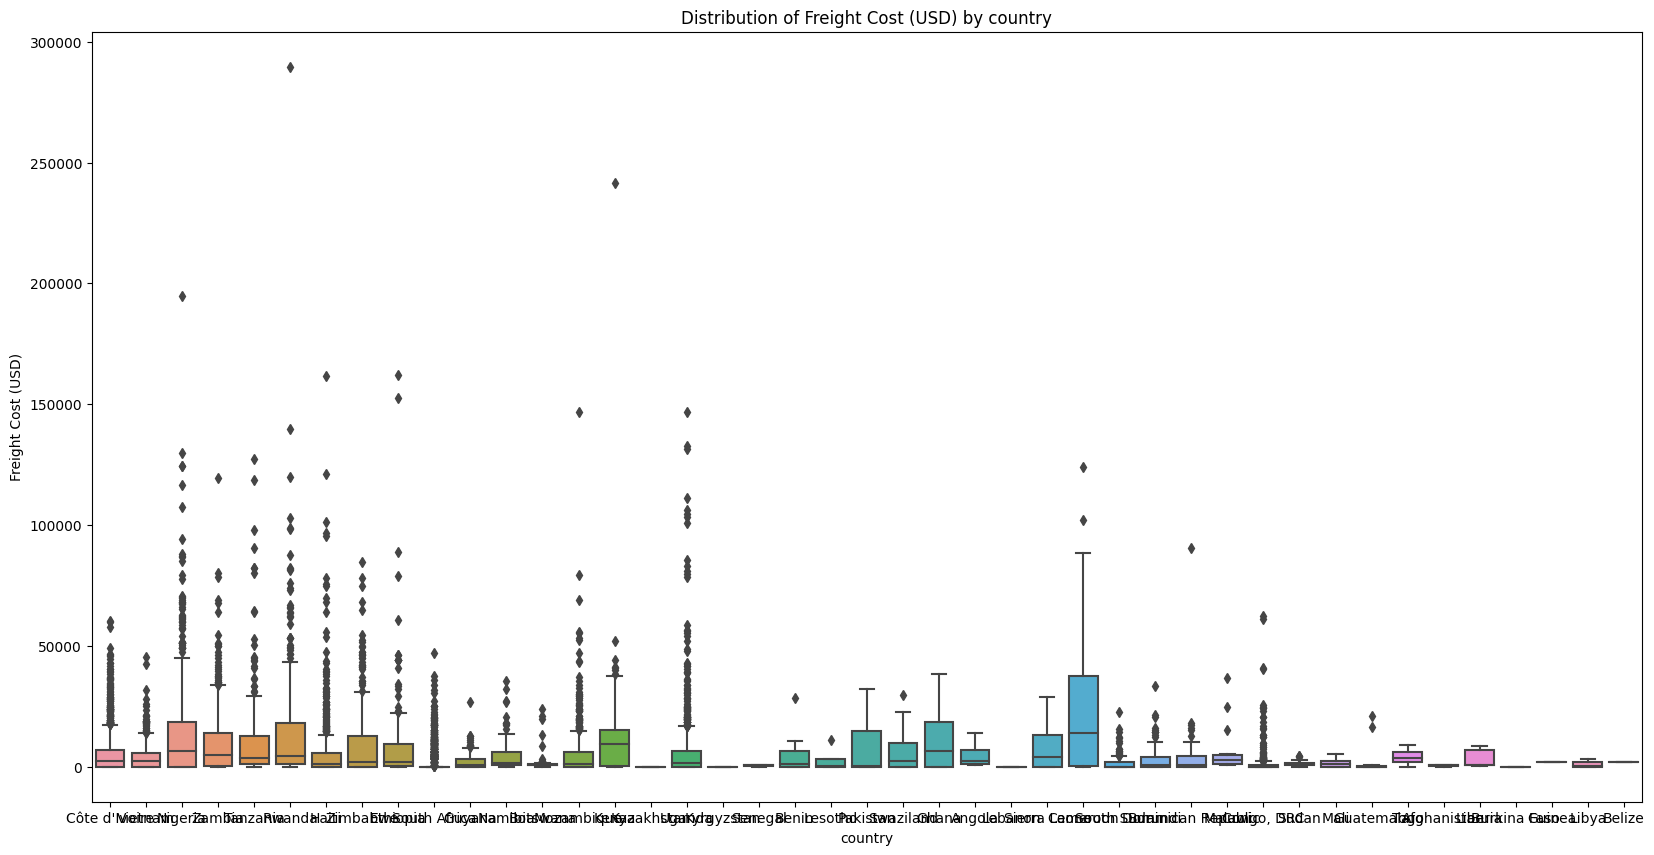

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,3.0,360.350000,312.430861,0.00,262.7800,525.560,540.5250,555.49
Angola,7.0,4685.242857,5082.455969,840.17,982.3150,2322.470,6939.6650,13790.10
Belize,1.0,1959.610000,NaN,1959.61,1959.6100,1959.610,1959.6100,1959.61
Benin,13.0,5078.090000,7963.513912,0.00,0.0000,1136.370,6477.6700,28541.79
Botswana,70.0,1970.431000,4568.609590,0.00,534.5100,684.420,1112.9025,23796.98
Burkina Faso,2.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
Burundi,98.0,3184.105306,5692.918732,0.00,0.0000,792.370,4212.9650,33228.68
Cameroon,75.0,23898.019867,28331.387362,0.00,274.5800,13924.230,37711.0500,123945.00
"Congo, DRC",333.0,2099.348078,6944.059315,0.00,0.0000,0.000,912.3600,62196.13


In [74]:
eda.analyze_freight_cost_distribution(df, 'country')

**Insights**: Country seems to play a good role with respect to cost, considering how varied the numbers are. 

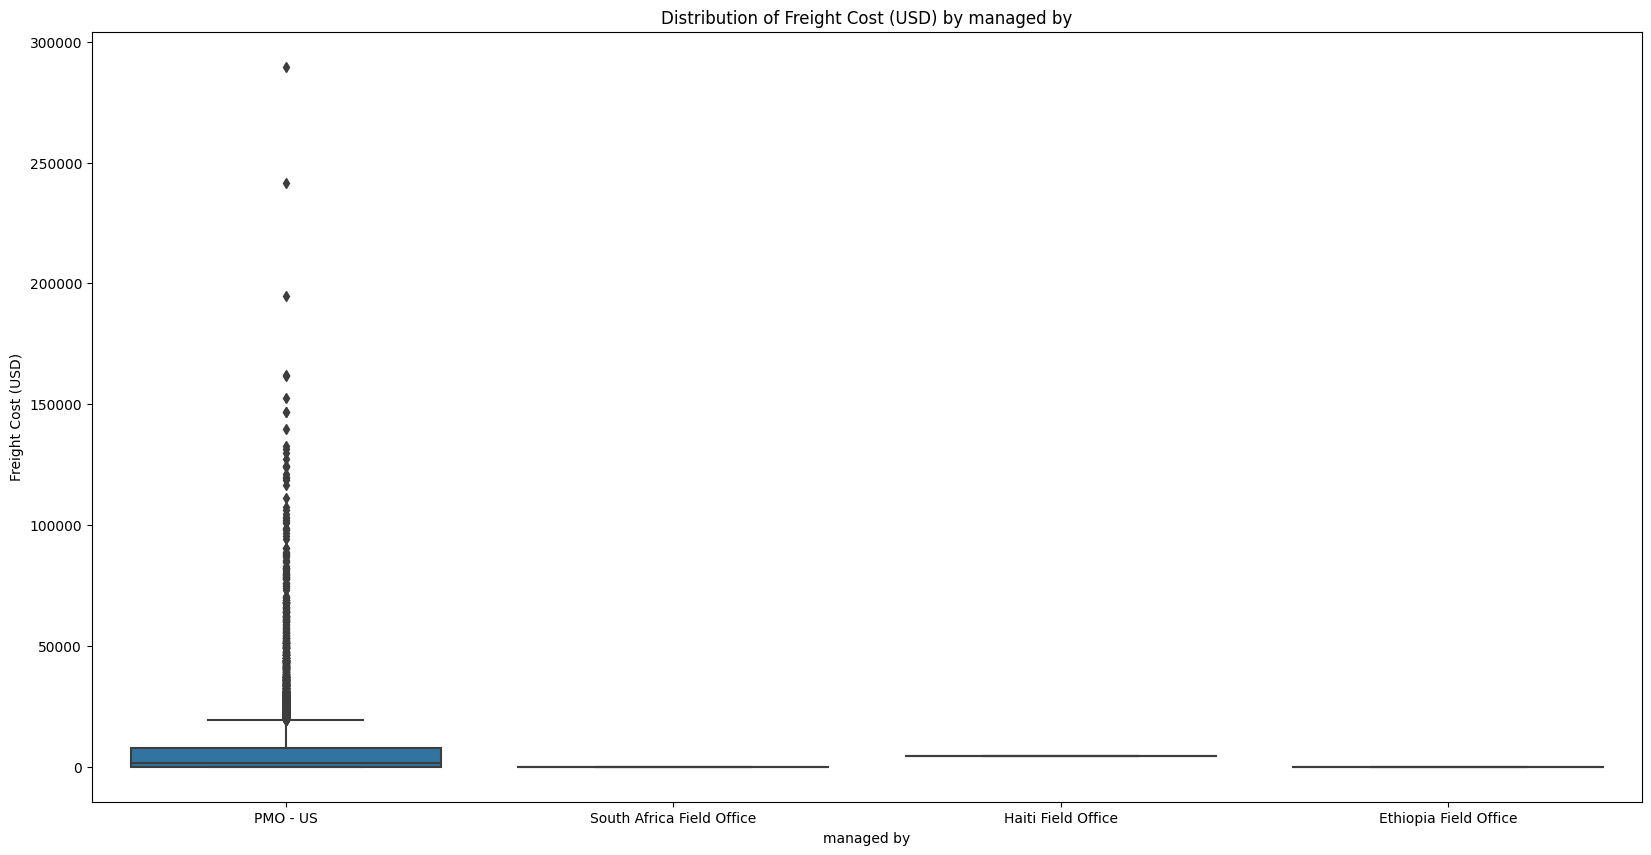

,count,mean,std,min,25%,50%,75%,max
managed by,,,,,,,,
Ethiopia Field Office,1.0,0.000000,NaN,0.00,0.00,0.00,0.00,0.00
Haiti Field Office,1.0,4625.810000,NaN,4625.81,4625.81,4625.81,4625.81,4625.81
PMO - US,10265.0,6703.674973,13433.929953,0.00,0.00,1462.71,7781.88,289653.20
South Africa Field Office,57.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


In [75]:
eda.analyze_freight_cost_distribution(df, 'managed by')

**Insights**: The managed by contains just four categories and almost all of the entries are from the PMO - US, considering how almost 99% of the dataset is from PMO - US, it does not make a lot of difference with respect to cost.

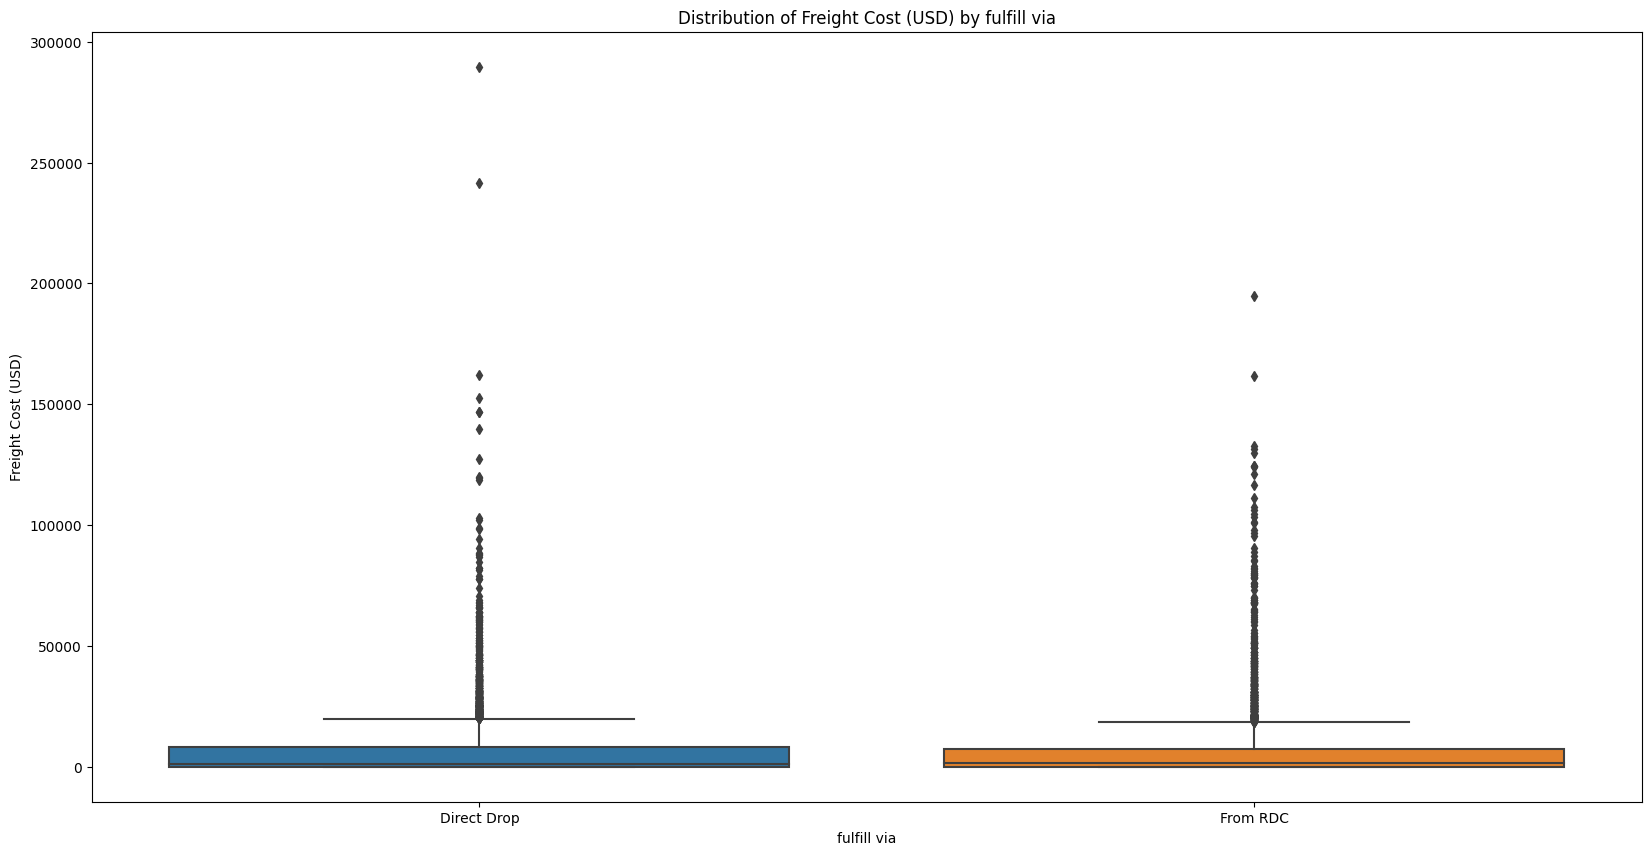

,count,mean,std,min,25%,50%,75%,max
fulfill via,,,,,,,,
Direct Drop,4920.0,6903.115661,13935.648984,0.0,0.0,1274.735,7969.415,289653.20
From RDC,5404.0,6449.763205,12900.152302,0.0,0.0,1547.470,7445.800,194623.44


In [76]:
eda.analyze_freight_cost_distribution(df, 'fulfill via')

**Insights**: There are just two categories in this column, both of them have similar counts, we can somewhat use this to predict cost, but there is not a lot of difference in mean or the medians of both categories. 

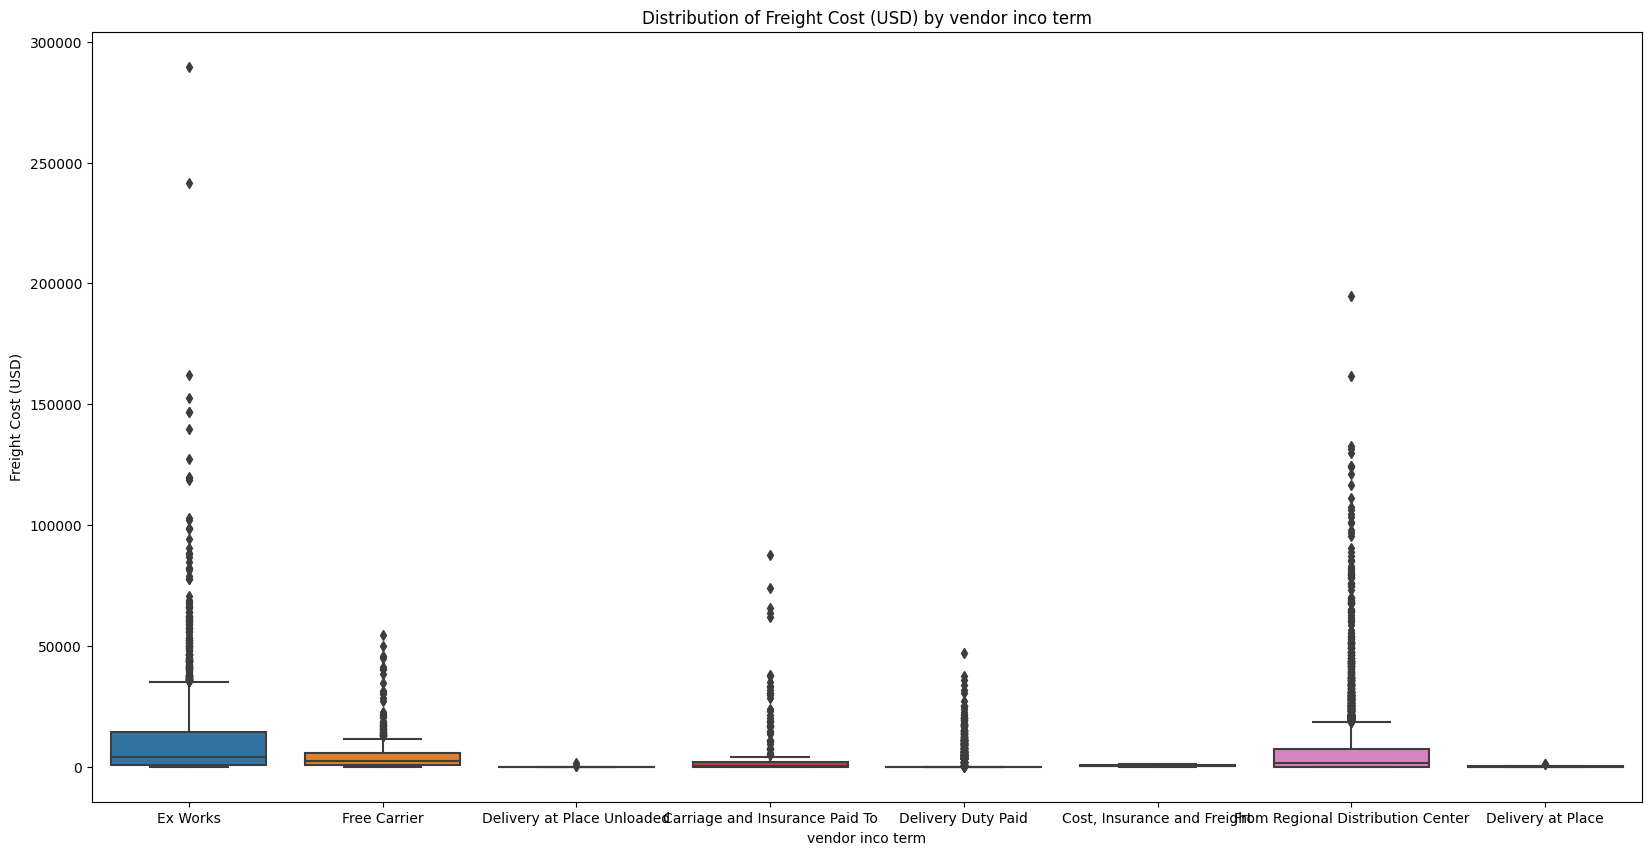

,count,mean,std,min,25%,50%,75%,max
vendor inco term,,,,,,,,
Carriage and Insurance Paid To,275.0,4256.802400,11632.621840,0.0,0.0000,290.000,1878.5550,87692.85
"Cost, Insurance and Freight",3.0,400.250000,540.045889,0.0,93.1250,186.250,600.3750,1014.50
Delivery Duty Paid,1443.0,1731.937983,4593.975042,0.0,0.0000,0.000,0.0000,47101.63
Delivery at Place,9.0,264.444444,444.882600,0.0,0.0000,0.000,330.0000,1061.00
Delivery at Place Unloaded,15.0,134.432667,369.818207,0.0,0.0000,0.000,0.0000,1401.49
Ex Works,2778.0,10168.700932,16864.714013,0.0,581.2575,3818.895,14416.2225,289653.20
Free Carrier,397.0,5136.708942,8000.850196,0.0,892.5000,2278.110,5506.0100,54424.24
From Regional Distribution Center,5404.0,6449.763205,12900.152302,0.0,0.0000,1547.470,7445.8000,194623.44


In [77]:
eda.analyze_freight_cost_distribution(df, 'vendor inco term')

**Insight**: The vendor inco terms seems to have some variance wrt cost.

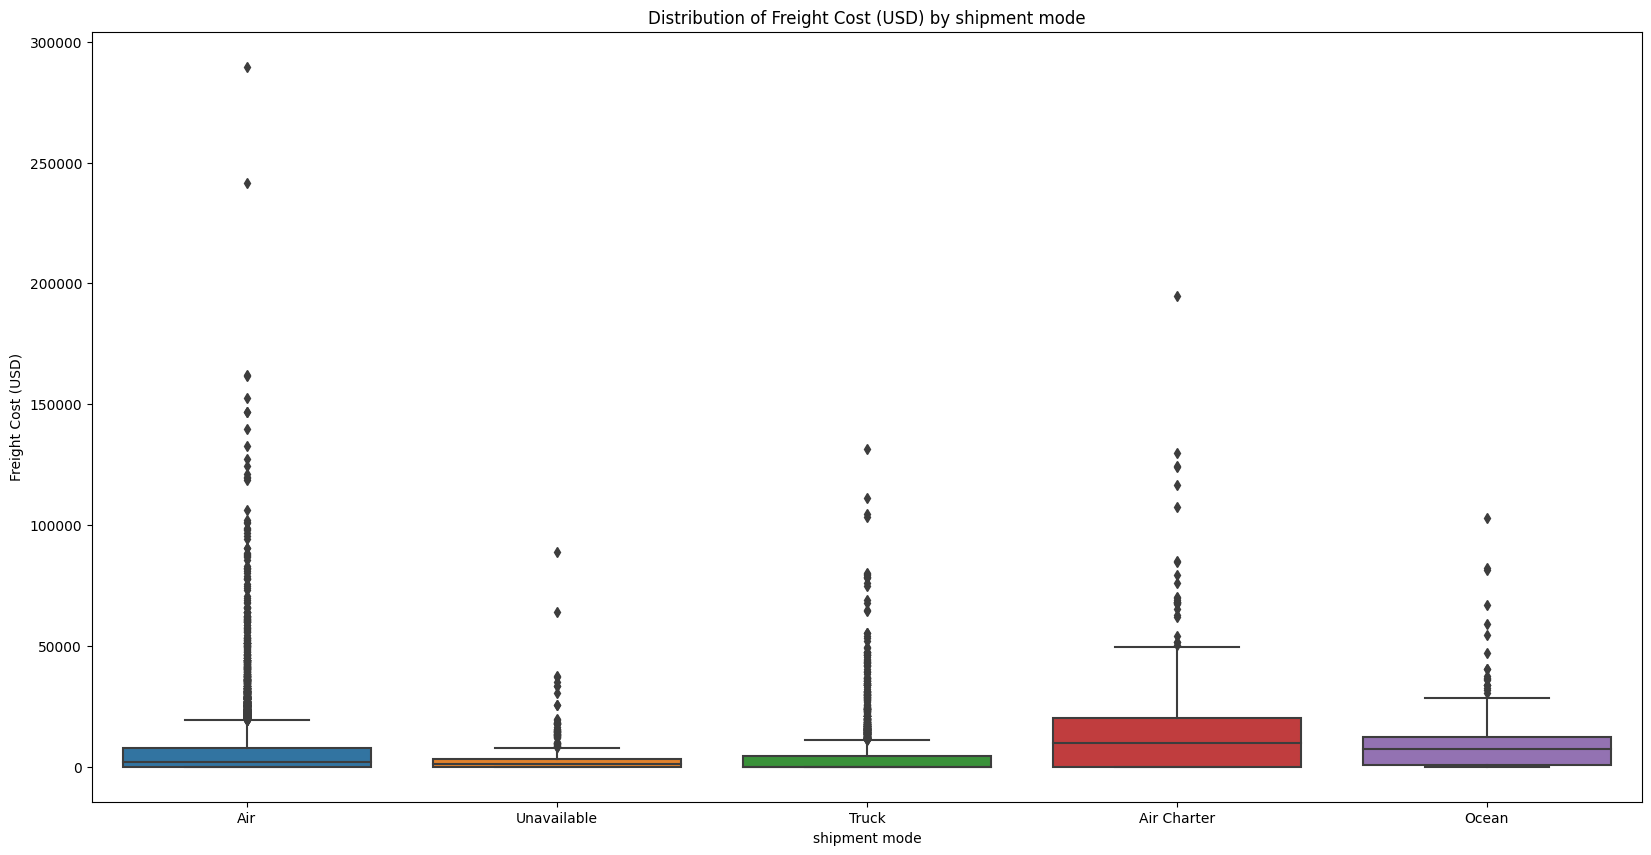

,count,mean,std,min,25%,50%,75%,max
shipment mode,,,,,,,,
Air,6113.0,7040.507689,14071.165196,0.0,0.0,1765.030,7789.88,289653.20
Air Charter,650.0,13732.474585,19090.893996,0.0,0.0,9736.100,20225.07,194623.44
Ocean,371.0,9678.514259,12142.608679,0.0,546.0,7292.270,12330.19,102761.99
Truck,2830.0,4192.822696,9803.653620,0.0,0.0,0.000,4484.62,131278.81
Unavailable,360.0,3879.723361,8346.017505,0.0,0.0,1150.325,3279.00,88801.00


In [78]:
eda.analyze_freight_cost_distribution(df, 'shipment mode')

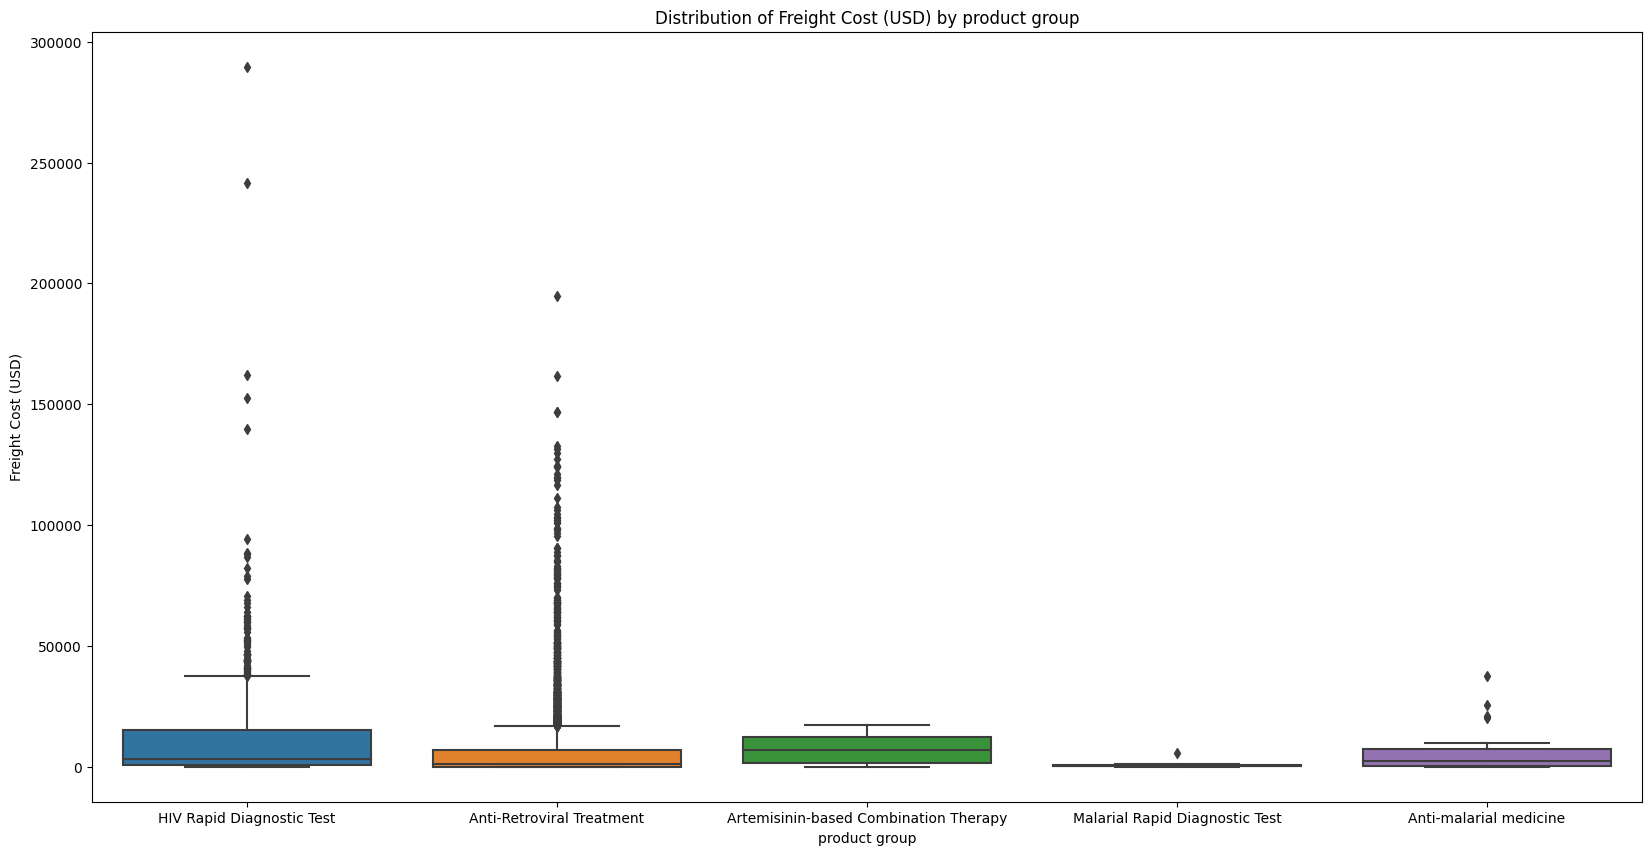

,count,mean,std,min,25%,50%,75%,max
product group,,,,,,,,
Anti-Retroviral Treatment,8550.0,5959.495289,12451.413818,0.0,0.0000,1098.54,6751.6275,194623.44
Anti-malarial medicine,22.0,6848.438182,10158.850043,0.0,406.5500,2410.86,7299.6150,37744.27
Artemisinin-based Combination Therapy,16.0,7116.846875,5812.035520,0.0,1698.9175,7117.16,12146.8625,17170.07
HIV Rapid Diagnostic Test,1728.0,10180.150839,17031.668177,0.0,540.0850,3126.13,15392.7950,289653.20
Malarial Rapid Diagnostic Test,8.0,1041.106250,1893.061492,0.0,135.0000,417.26,769.2025,5642.36


In [79]:
eda.analyze_freight_cost_distribution(df, 'product group')

**Insights**: Nearly 85% of the dataset contains Anti Retroviral Treatment as product group, and another chunk contains HIV Rapid Diagnostic Test but there is considerable difference in the mean costs. 

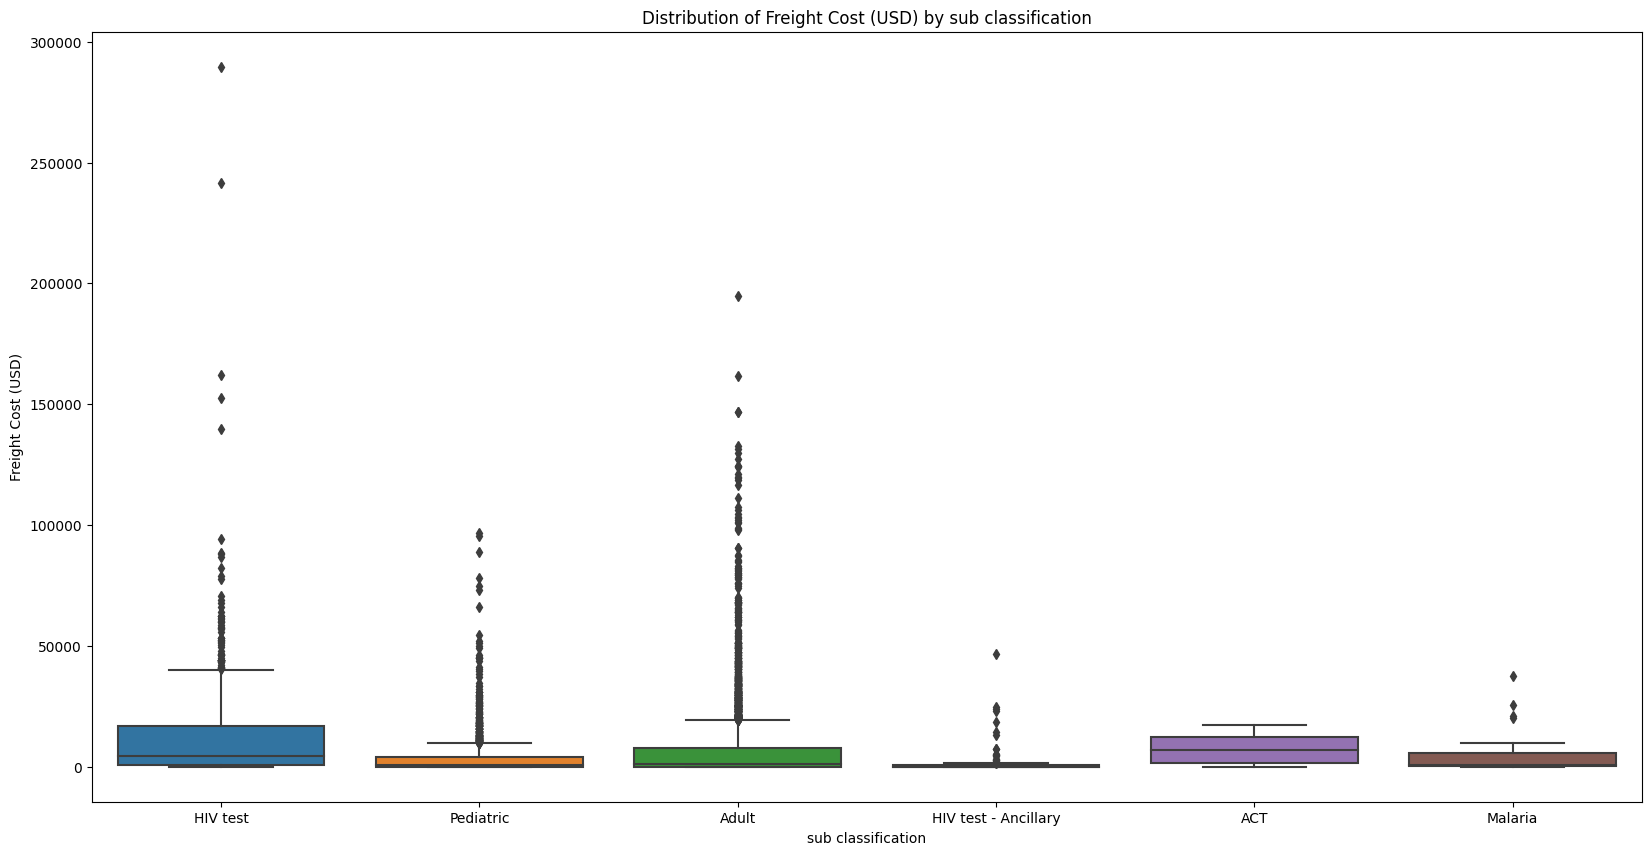

,count,mean,std,min,25%,50%,75%,max
sub classification,,,,,,,,
ACT,16.0,7116.846875,5812.035520,0.0,1698.9175,7117.160,12146.8625,17170.07
Adult,6595.0,6633.027463,13390.067762,0.0,0.0000,1320.080,7721.0350,194623.44
HIV test,1567.0,11071.920753,17563.936898,0.0,839.6450,4329.080,16657.8150,289653.20
HIV test - Ancillary,161.0,1500.626273,5297.983659,0.0,0.0000,0.000,592.4600,46552.30
Malaria,30.0,5299.816333,9078.558741,0.0,353.8850,675.345,5846.0900,37744.27
Pediatric,1955.0,3687.400818,8158.767603,0.0,0.0000,723.590,3903.9450,96669.40


In [80]:
eda.analyze_freight_cost_distribution(df, 'sub classification')

**Insights**: This column is also somewhat similar to product group as in there is one major category but the other ones have a difference in mean costs.

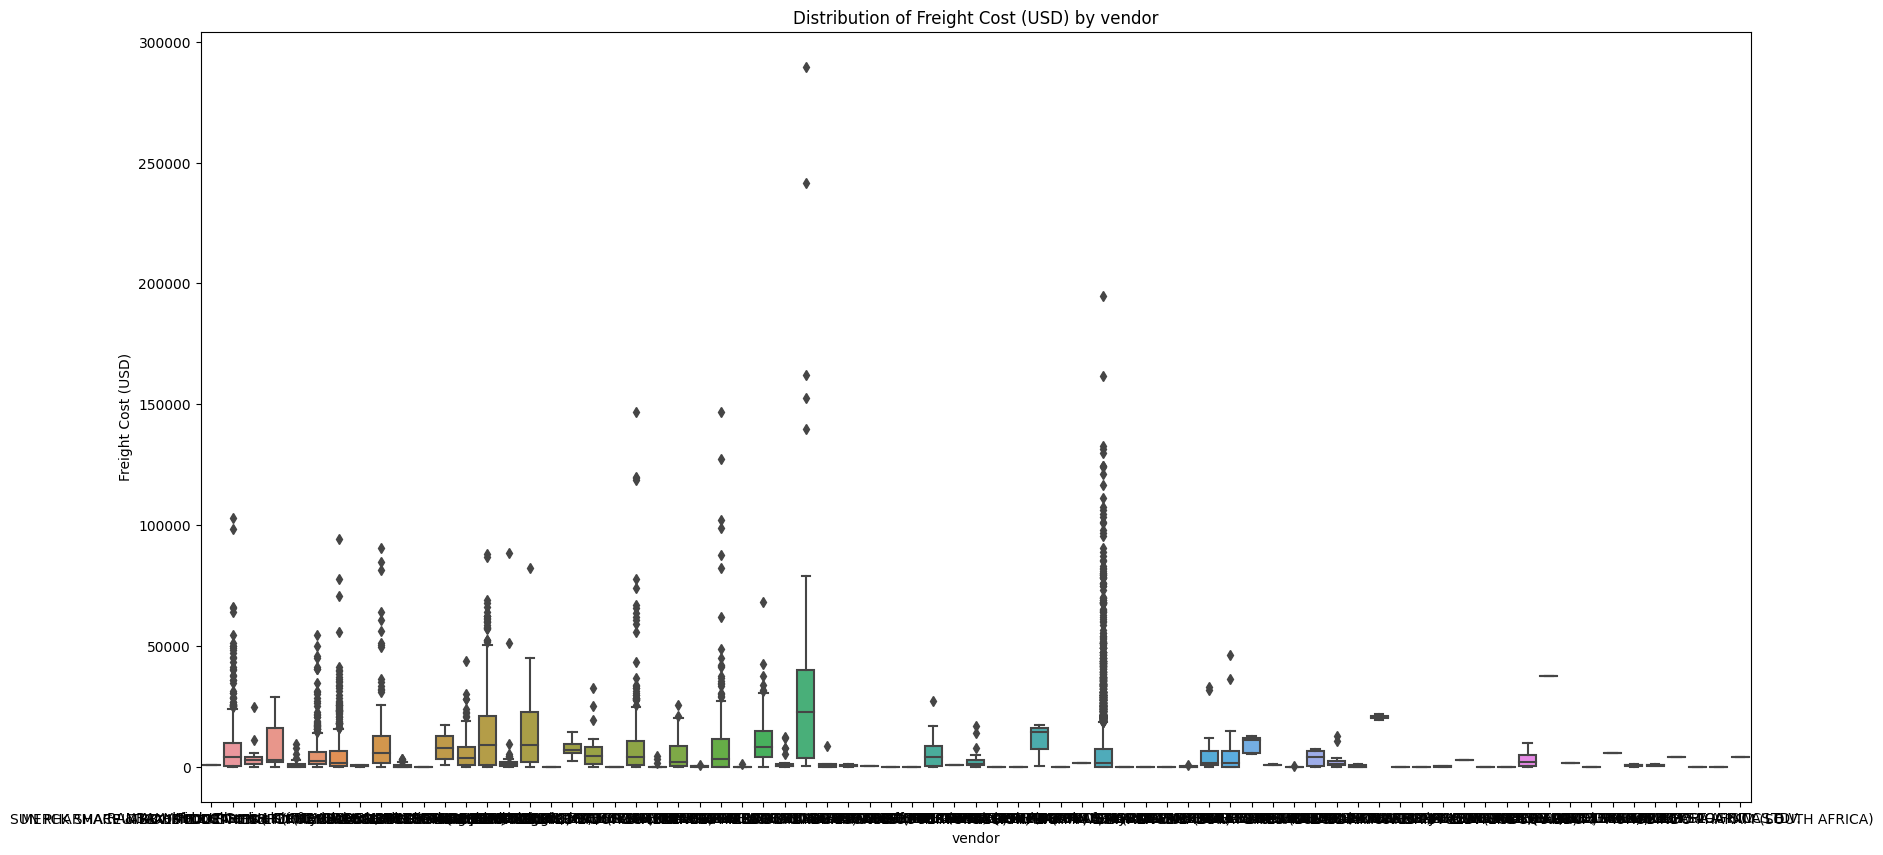

,count,mean,std,min,25%,50%,75%,max
vendor,,,,,,,,
ABBOTT LABORATORIES (PUERTO RICO),1.0,314.000000,NaN,314.00,314.000,314.000,314.0000,314.00
ABBOTT LOGISTICS B.V.,1.0,0.000000,NaN,0.00,0.000,0.000,0.0000,0.00
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),347.0,5628.572622,8365.077365,0.00,942.115,2569.330,6220.5600,54424.24
"ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)",4.0,166.665000,333.330000,0.00,0.000,0.000,166.6650,666.66
"ACCESS BIO, INC.",1.0,5642.360000,NaN,5642.36,5642.360,5642.360,5642.3600,5642.36
...,...,...,...,...,...,...,...,...
THE MEDICAL EXPORT GROUP BV,1.0,37744.270000,NaN,37744.27,37744.270,37744.270,37744.2700,37744.27
TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.,3.0,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00
"Trinity Biotech, Plc",356.0,6520.137219,11618.912293,0.00,305.330,1733.065,6532.6625,94267.77


In [81]:
eda.analyze_freight_cost_distribution(df, 'vendor')

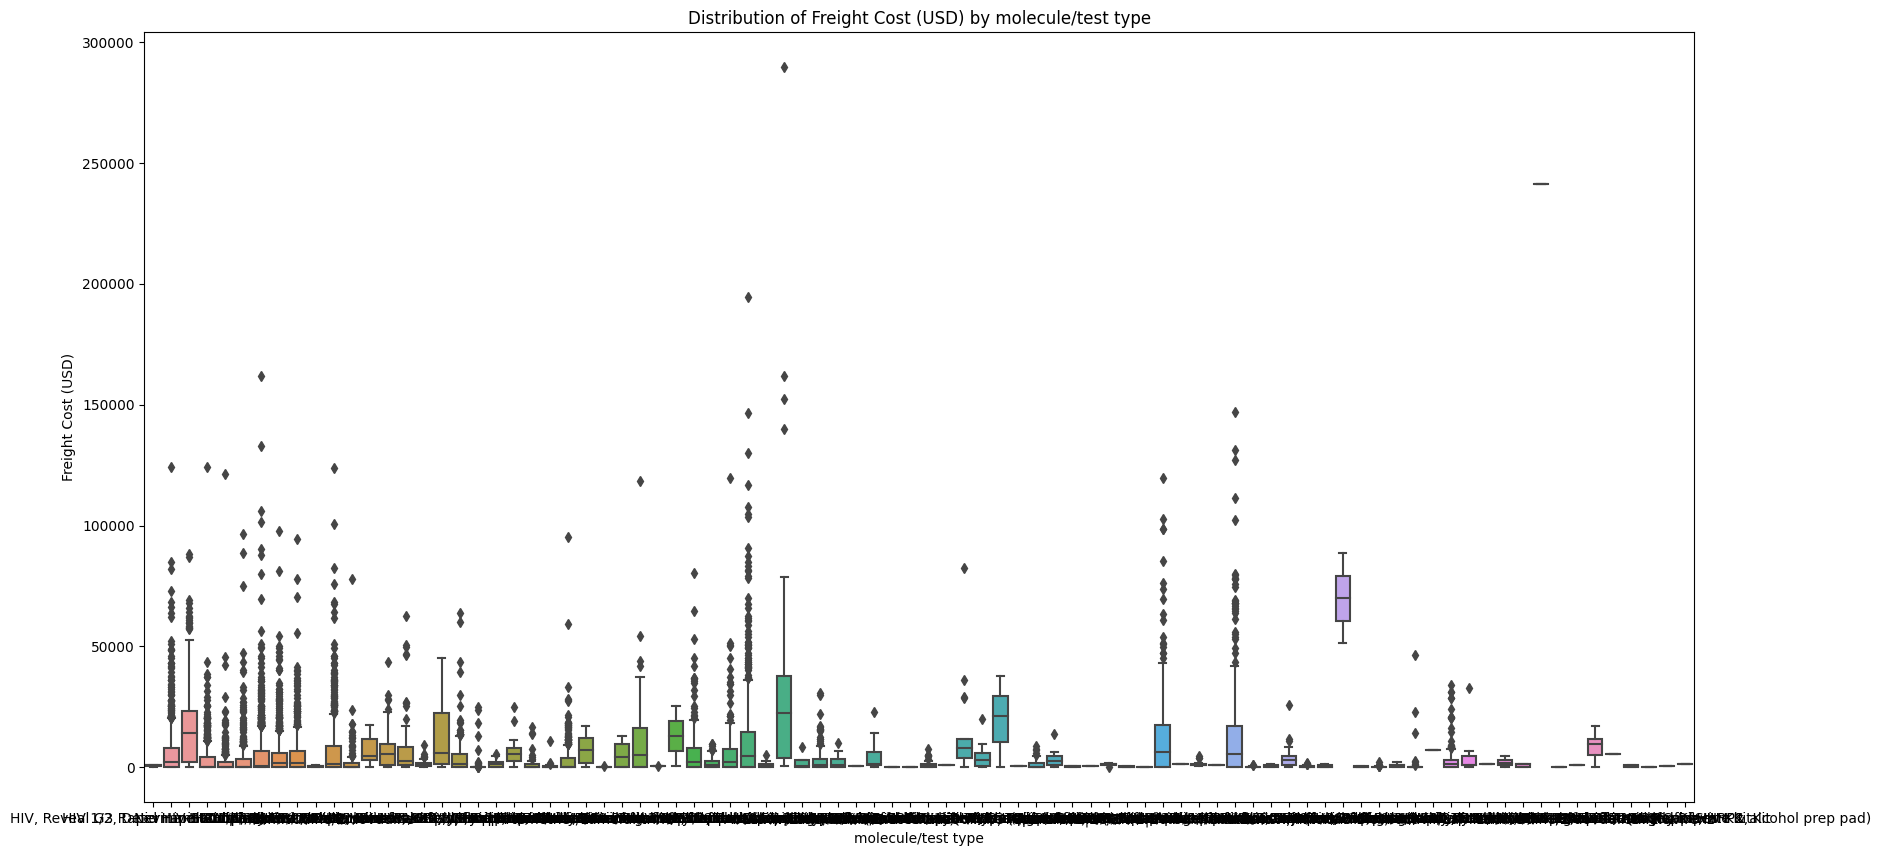

,count,mean,std,min,25%,50%,75%,max
molecule/test type,,,,,,,,
Abacavir,453.0,3157.002097,7111.886694,0.0,0.000,0.000,3755.9100,95269.39
Abacavir/Lamivudine,136.0,3787.915662,7053.252685,0.0,0.000,1222.190,3175.2375,34218.36
Abacavir/Lamivudine/Zidovudine,28.0,2075.609286,2670.726058,0.0,0.000,970.720,3327.1825,10137.04
Artemether/Lumefantrine,12.0,7709.029167,5772.511957,0.0,1921.395,7117.160,12146.8625,17170.07
Artesunate+Amodiaquine,4.0,5340.300000,6411.523026,0.0,0.000,4265.145,9605.4450,12830.91
...,...,...,...,...,...,...,...,...
Saquinavir,53.0,1633.740189,3602.638794,0.0,0.000,0.000,1242.3300,16751.58
Stavudine,284.0,2831.952113,9044.699007,0.0,0.000,0.000,2023.1700,121330.06
Sulfadoxine/Pyrimethamine,13.0,4460.758462,5617.319803,0.0,428.660,3089.830,5914.0000,20134.43


In [82]:
eda.analyze_freight_cost_distribution(df, 'molecule/test type')

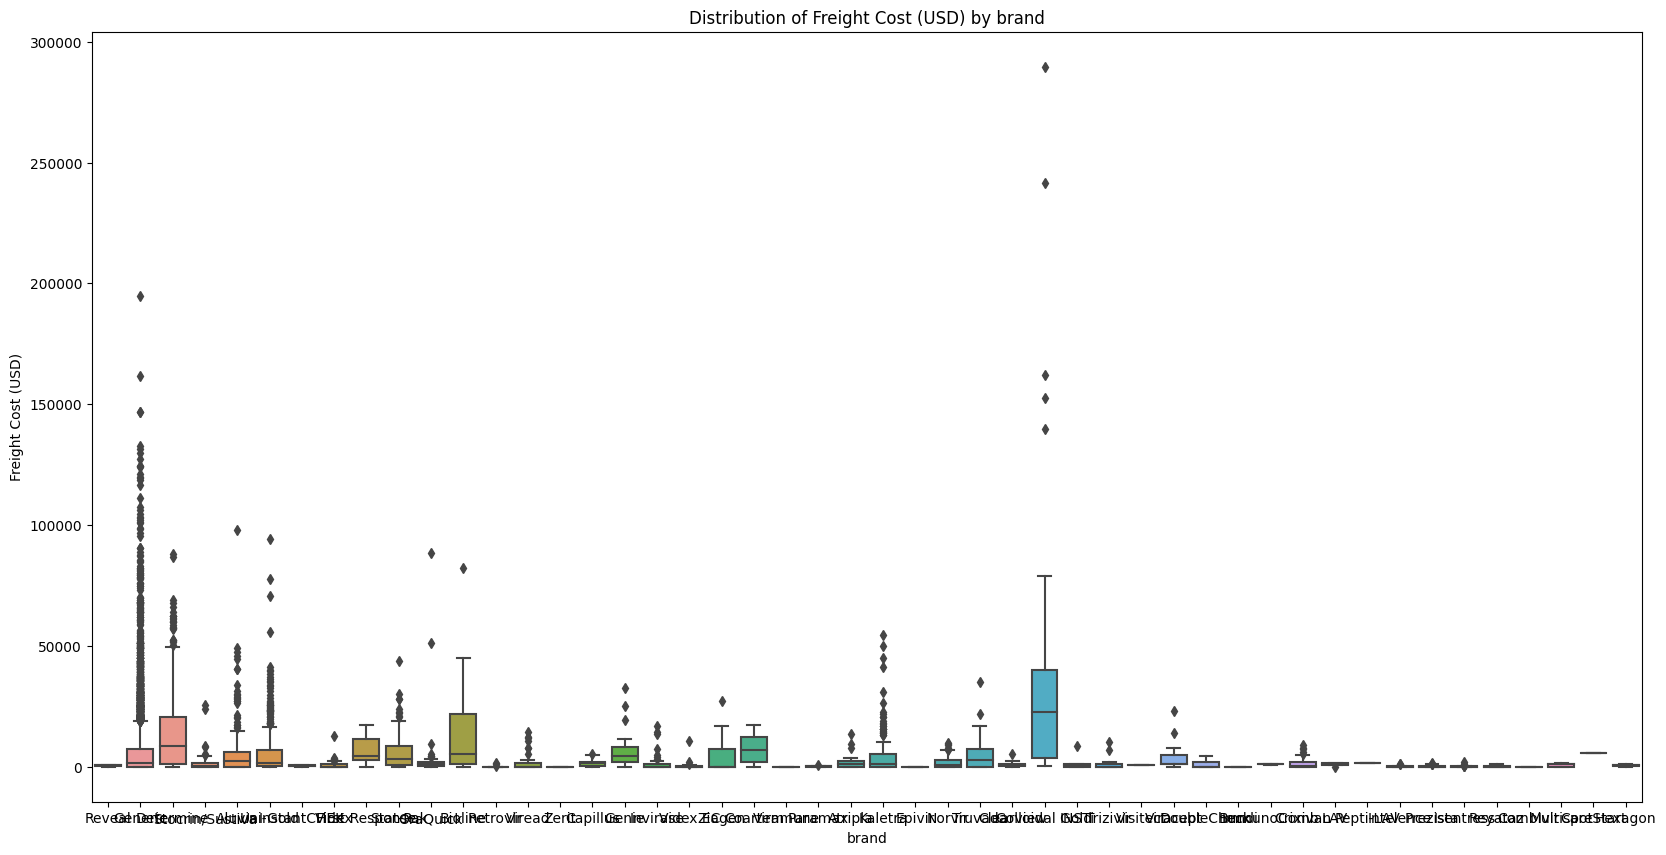

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Aluvia,250.0,6011.140960,10792.463128,0.00,0.0000,2505.280,5927.4875,97918.87
Atripla,16.0,2630.735000,4027.416706,0.00,0.0000,1119.770,2432.8425,13353.34
Bioline,113.0,10847.998938,12655.160897,0.00,1205.4300,5408.930,21952.3500,82236.74
Bundi,2.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
Capillus,35.0,1589.178571,1528.813583,0.00,261.5600,1372.850,2115.7300,5446.06
CareStart,1.0,5642.360000,NaN,5642.36,5642.3600,5642.360,5642.3600,5642.36
Clearview,19.0,1032.250000,1208.321917,0.00,185.9050,870.400,1310.0500,5213.02
Coartem,12.0,7709.029167,5772.511957,0.00,1921.3950,7117.160,12146.8625,17170.07
Colloidal Gold,70.0,34056.474143,51325.338069,486.18,3781.5475,22618.855,39957.1300,289653.20


In [83]:
eda.analyze_freight_cost_distribution(df, 'brand')

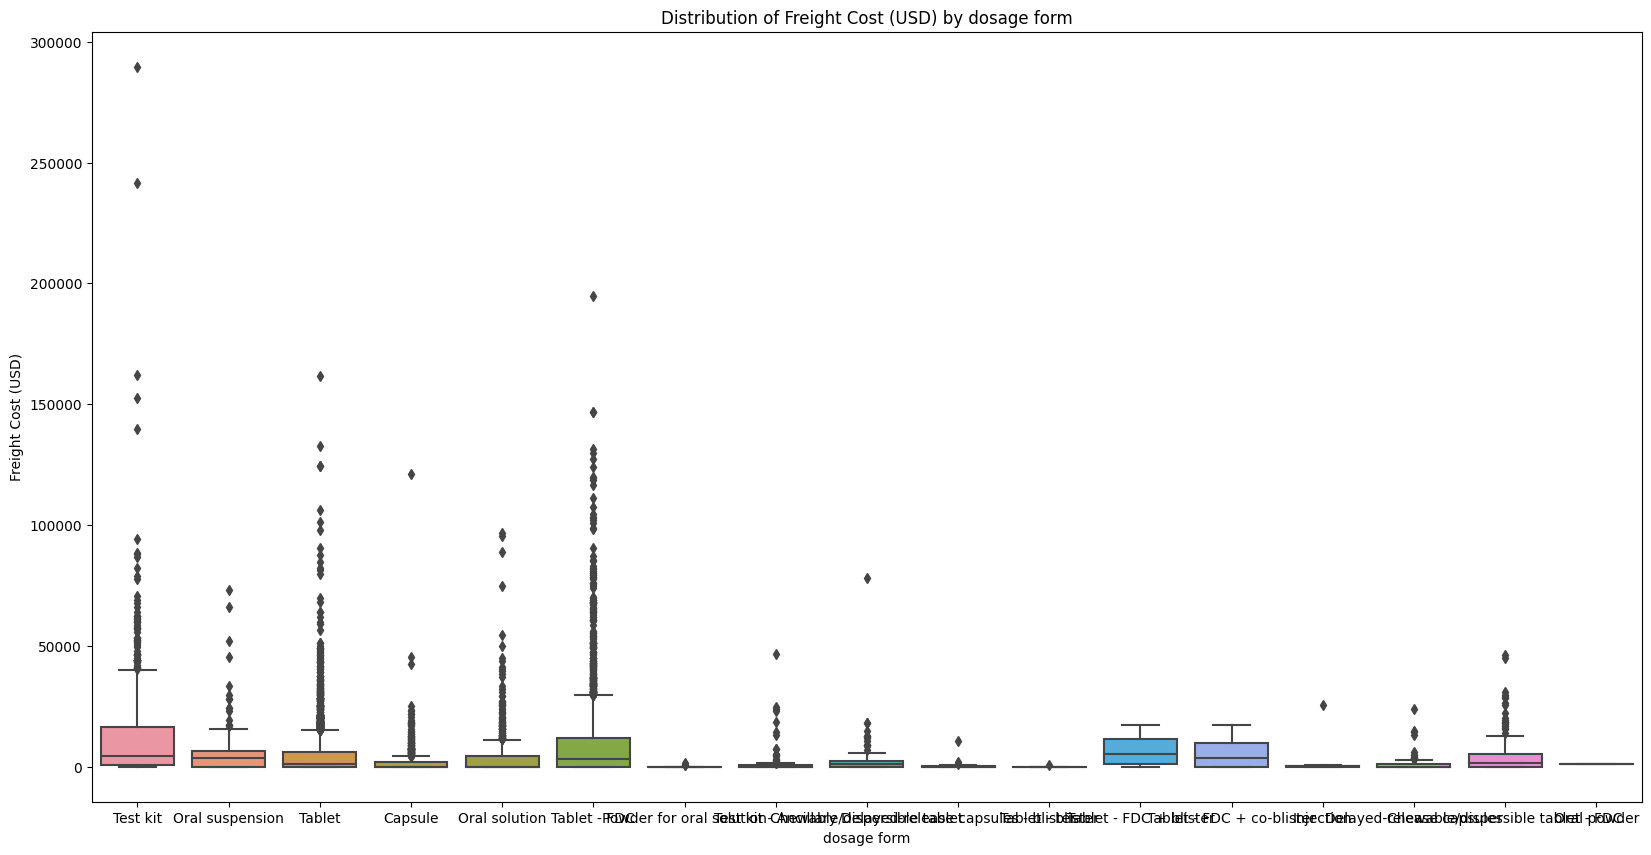

,count,mean,std,min,25%,50%,75%,max
dosage form,,,,,,,,
Capsule,729.0,2138.821866,6256.841266,0.00,0.000,0.000,1759.210,121330.06
Chewable/dispersible tablet,146.0,2662.563356,7183.699558,0.00,0.000,938.055,2515.940,78061.30
Chewable/dispersible tablet - FDC,239.0,4277.148787,7114.810243,0.00,0.000,1672.700,5146.995,46111.55
Delayed-release capsules,131.0,1133.129084,3063.981444,0.00,0.000,0.000,1119.830,23760.45
Delayed-release capsules - blister,41.0,457.322927,1706.288495,0.00,0.000,0.000,378.000,10816.49
Injection,6.0,4361.680000,10311.470251,0.00,0.000,104.685,468.960,25405.22
Oral powder,1.0,1253.710000,NaN,1253.71,1253.710,1253.710,1253.710,1253.71
Oral solution,727.0,4152.407497,9629.489258,0.00,0.000,0.000,4436.980,96669.40
Oral suspension,214.0,5727.721589,9733.727310,0.00,0.000,3433.990,6633.975,72991.45


In [84]:
eda.analyze_freight_cost_distribution(df, 'dosage form')

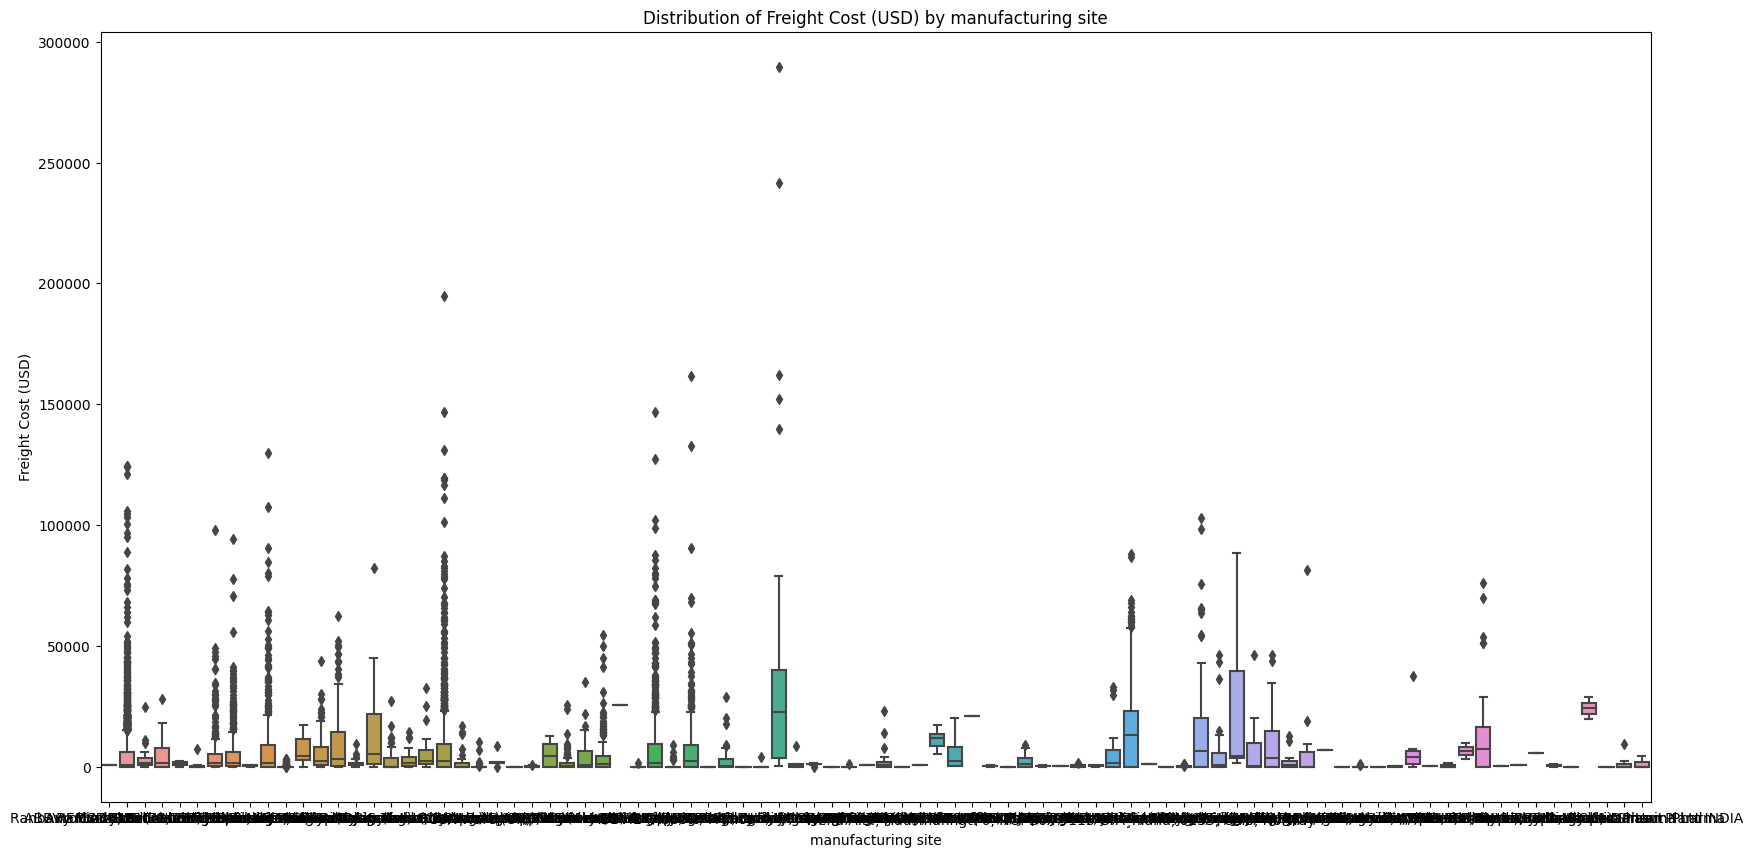

,count,mean,std,min,25%,50%,75%,max
manufacturing site,,,,,,,,
ABBSP,1.0,0.000000,NaN,0.00,0.0000,0.00,0.0000,0.00
ABBVIE (Abbott) France,25.0,1170.481200,2367.009468,0.00,0.0000,0.00,0.0000,8956.05
ABBVIE (Abbott) Japan Co. Ltd.,2.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00
ABBVIE (Abbott) Logis. UK,219.0,4286.782603,8157.451482,0.00,0.0000,1152.90,4466.3800,54424.24
ABBVIE (Abbott) St. P'burg USA,6.0,1325.470000,2932.280300,0.00,0.0000,0.00,499.9950,7286.16
...,...,...,...,...,...,...,...,...
"Standard Diagnostics, Korea",114.0,10759.002632,12634.822212,0.00,1201.4475,5390.90,21920.6625,82236.74
"Strides, Bangalore, India.",540.0,6923.565130,13609.276644,0.00,0.0000,2234.01,9149.3125,161712.87
"Trinity Biotech, Plc",405.0,6083.870741,11023.411299,0.00,167.4400,1691.15,6164.1000,94267.77


In [85]:
eda.analyze_freight_cost_distribution(df, 'manufacturing site')

**Insights**: All of the above columns show variability in costs. 

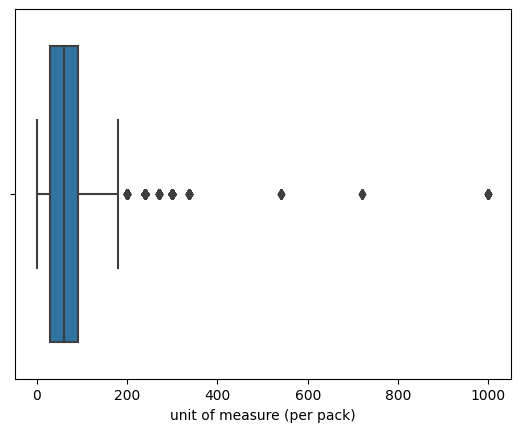

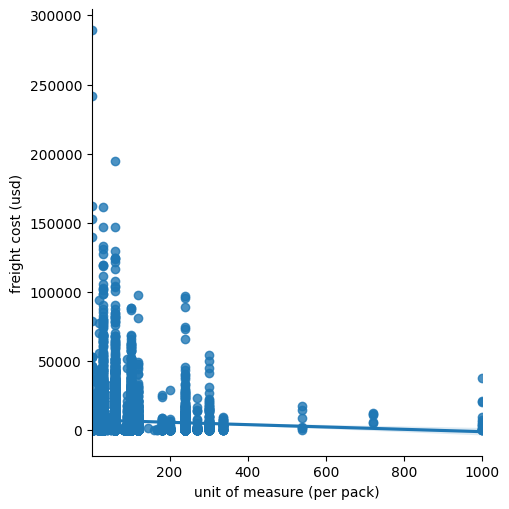

-0.048369220228761715

In [86]:
eda.plot_and_analyze_data(df, 'unit of measure (per pack)')

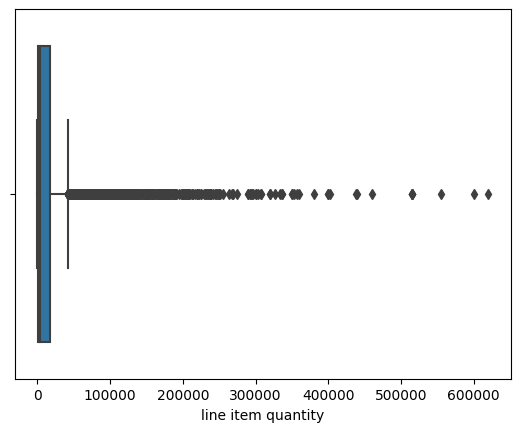

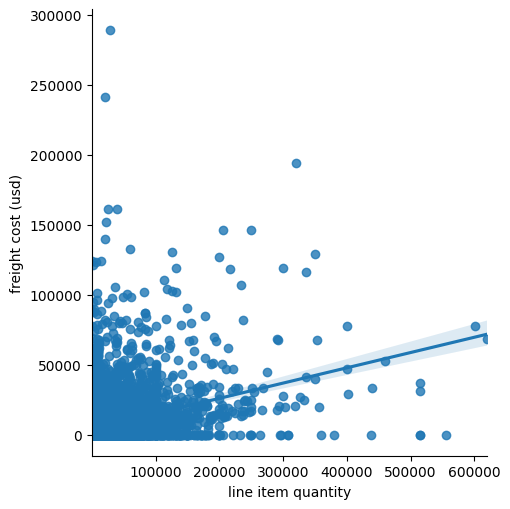

0.3256270678455524

In [87]:
eda.plot_and_analyze_data(df, 'line item quantity')

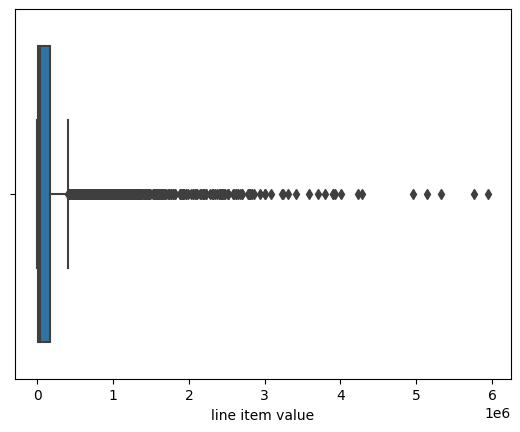

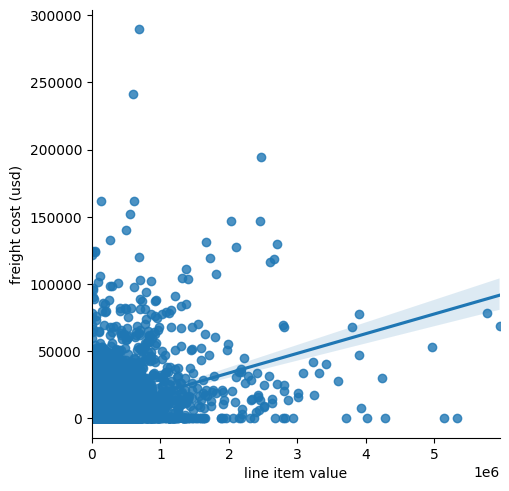

0.37745121956507066

In [88]:
eda.plot_and_analyze_data(df, 'line item value')

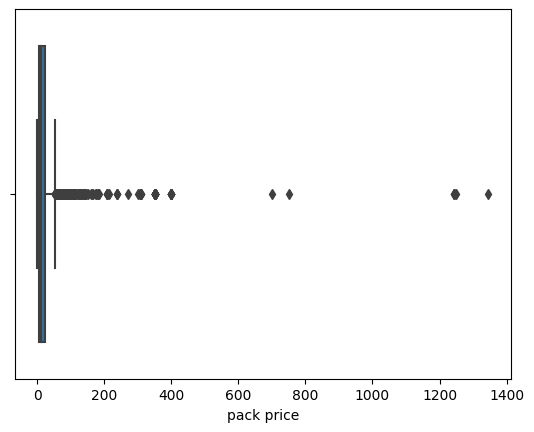

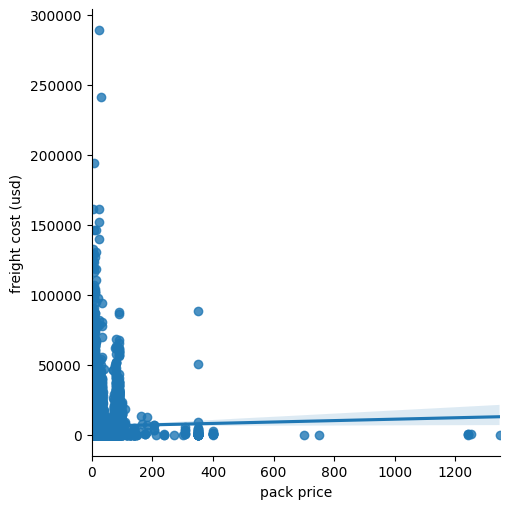

0.017194653547052786

In [89]:
eda.plot_and_analyze_data(df, 'pack price')

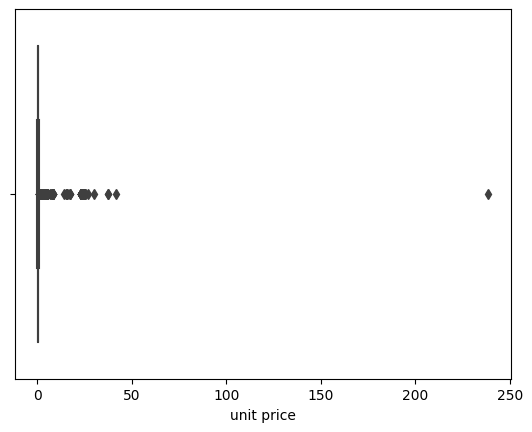

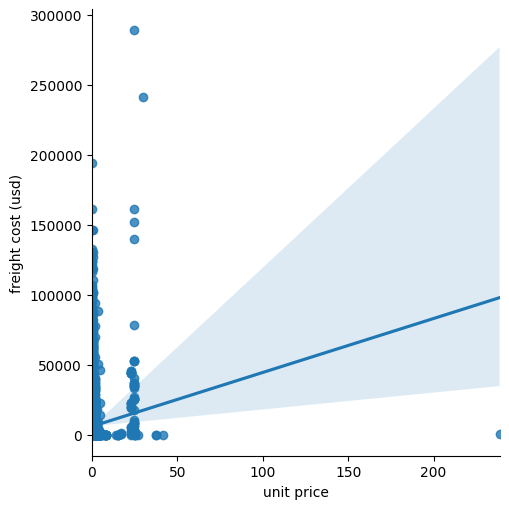

0.09413738997220071

In [90]:
eda.plot_and_analyze_data(df, 'unit price')

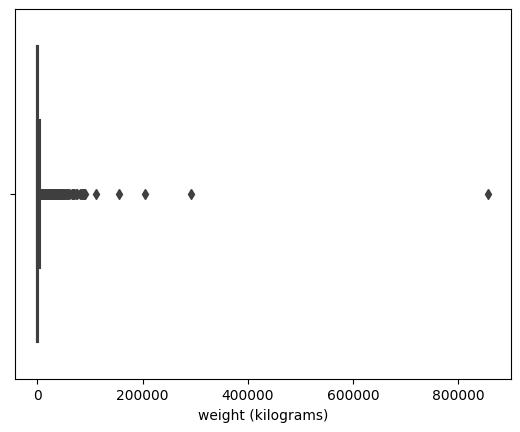

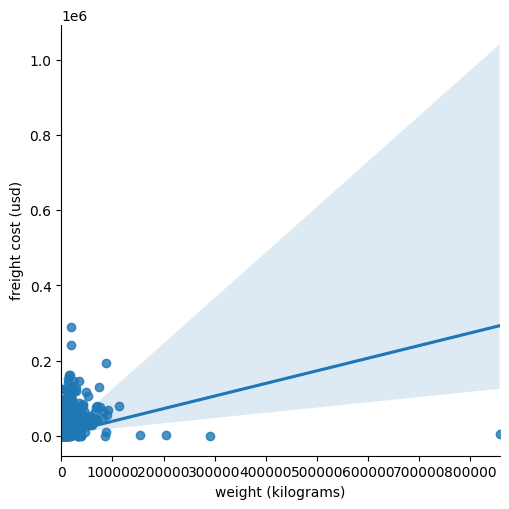

0.268783178264727

In [91]:
eda.plot_and_analyze_data(df, 'weight (kilograms)')

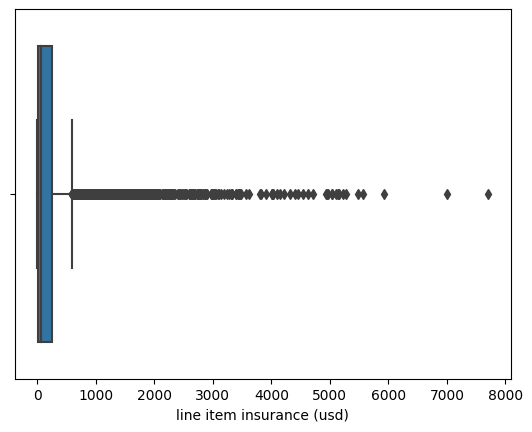

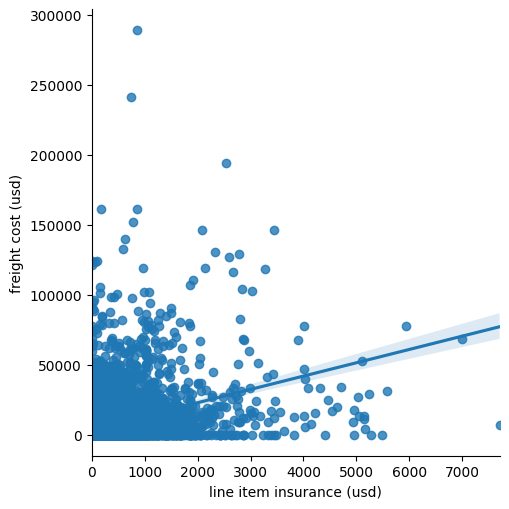

0.34944963553487507

In [92]:
eda.plot_and_analyze_data(df, 'line item insurance (usd)')

**Insights**: Most of the numerical variables have weak correlations with cost. 

### Outlier Handling ###

In [93]:
eda.outlier_report(df)

,Numerical Variable,Possible Outliers,Definite Outliers,Total Outliers
0,id,0,0,0
1,unit of measure (per pack),880,67,947
2,line item quantity,245,217,462
3,line item value,178,193,371
4,pack price,50,80,130
5,unit price,8,90,98
6,weight (kilograms),54,60,114
7,freight cost (usd),190,185,375
8,line item insurance (usd),187,217,404


In [94]:
df = eda.winsorize_dataframe(df, limits=(0.05, 0.05))

**Insights**: We looked for outliers and winsorized the outliers to 5% and 95% of the mean. 

### Feature Engineering ###
Our feature engineering is focussed mainly on countries, and the date columns. We will group countries by continent and then for dates, we will try to find differences in delivery dates to check if they affect costs. 

In [95]:
country_to_continent = {
    'Afghanistan': 'Asia',
    'Angola': 'Africa',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Botswana': 'Africa',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cameroon': 'Africa',
    'Congo, DRC': 'Africa',
    'Côte d\'Ivoire': 'Africa',
    'Dominican Republic': 'North America',
    'Ethiopia': 'Africa',
    'Ghana': 'Africa',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Malawi': 'Africa',
    'Mali': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Nigeria': 'Africa',
    'Pakistan': 'Asia',
    'Rwanda': 'Africa',
    'Senegal': 'Africa',
    'Sierra Leone': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Sudan': 'Africa',
    'Swaziland': 'Africa',
    'Tanzania': 'Africa',
    'Togo': 'Africa',
    'Uganda': 'Africa',
    'Vietnam': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}


In [96]:
df['continent'] = df['country'].map(country_to_continent)
print(df[['country', 'continent']])

             country continent
0      Côte d'Ivoire    Africa
1            Vietnam      Asia
2      Côte d'Ivoire    Africa
3            Vietnam      Asia
4            Vietnam      Asia
...              ...       ...
10319       Zimbabwe    Africa
10320  Côte d'Ivoire    Africa
10321         Zambia    Africa
10322       Zimbabwe    Africa
10323       Zimbabwe    Africa

[10324 rows x 2 columns]


**Insights**: We have now mapped the countries to their respective continents. 

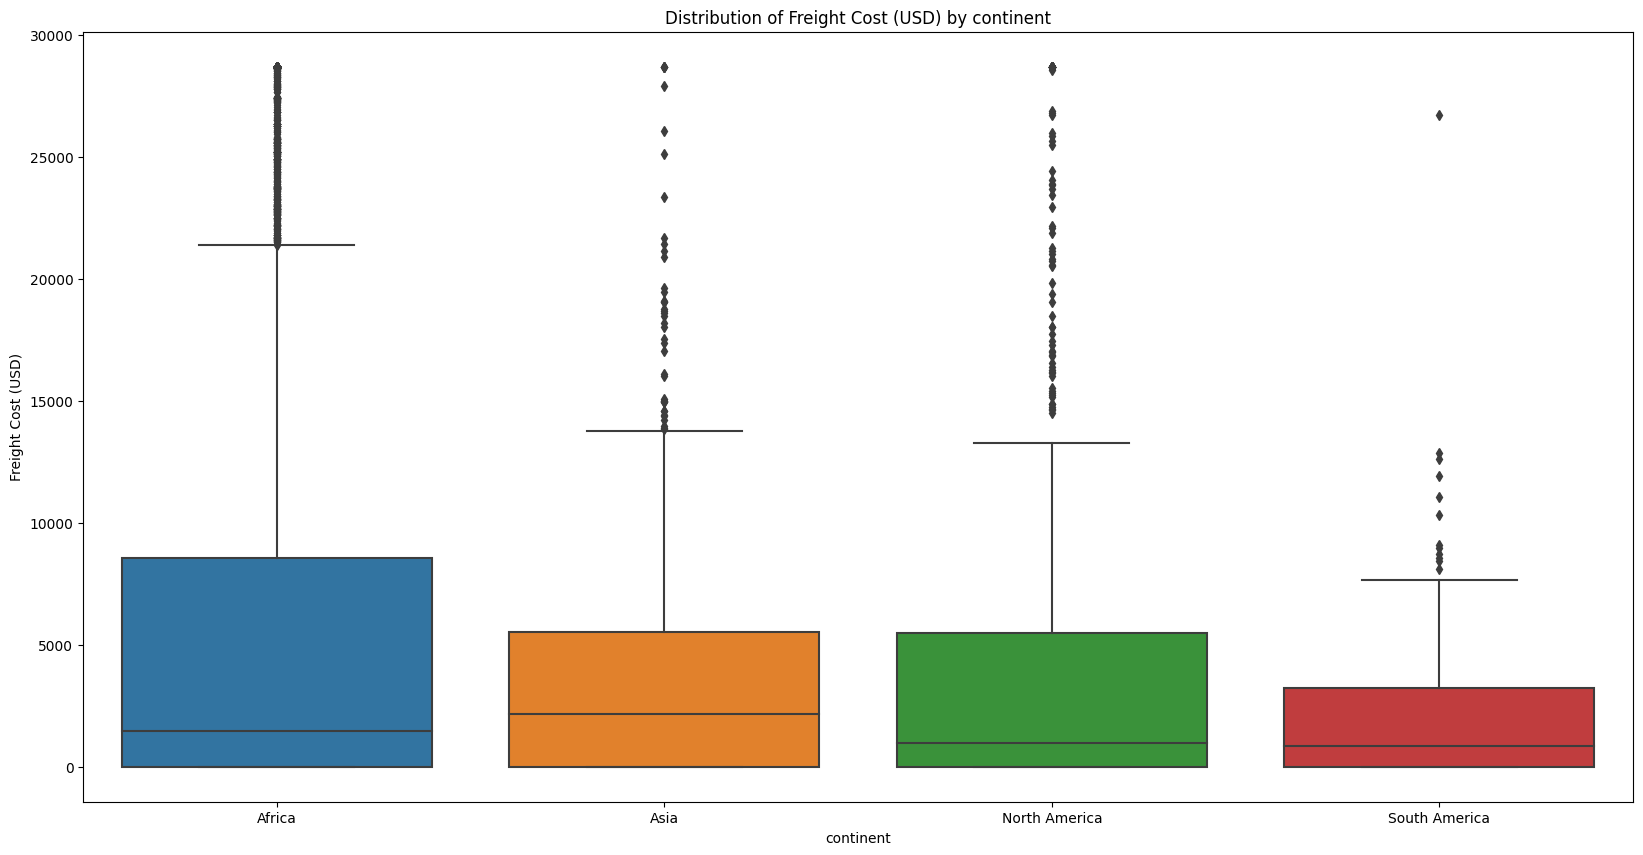

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,8646.0,5909.934076,8576.783761,0.0,0.0,1478.170,8555.165,28709.52
Asia,718.0,3910.237953,5225.383988,0.0,0.0,2148.575,5518.695,28709.52
North America,723.0,4630.506501,7773.173610,0.0,0.0,977.640,5500.115,28709.52
South America,237.0,2083.733586,3119.763560,0.0,0.0,863.240,3248.600,26710.20


In [97]:
eda.analyze_freight_cost_distribution(df, 'continent')

**Insights**: Makes sense add points** Add insights**

In [98]:
df['days between scheduled and delivered'] = (df['delivered to client date'] - df['scheduled delivery date']).dt.days
df['days between delivered and recorded'] = (df['delivery recorded date'] - df['delivered to client date']).dt.days


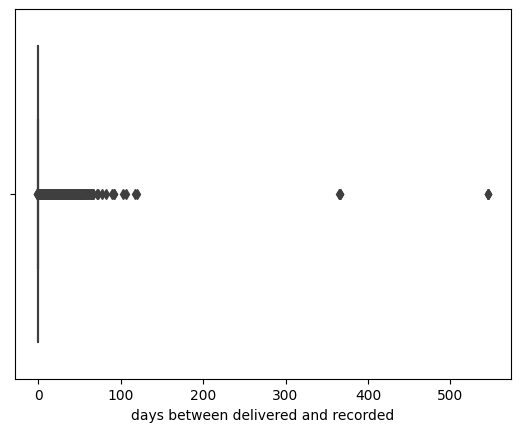

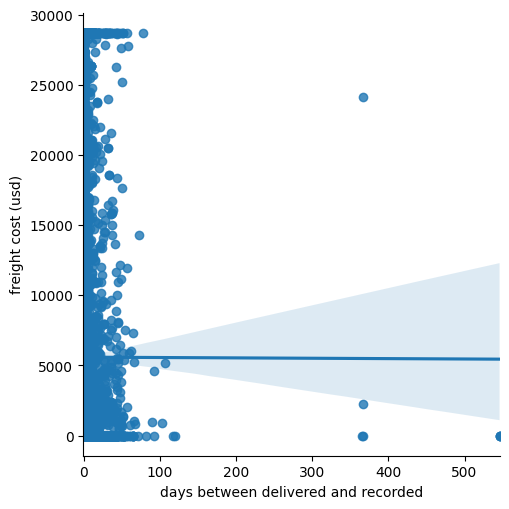

-0.0004818269989996874

In [99]:
eda.plot_and_analyze_data(df, 'days between delivered and recorded')

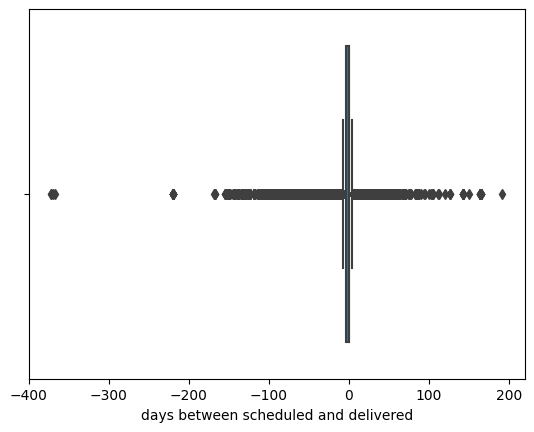

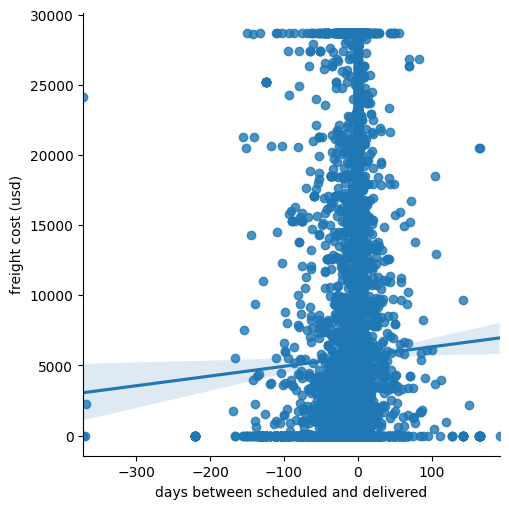

0.022791119370404005

In [100]:
eda.plot_and_analyze_data(df, 'days between scheduled and delivered')

In [101]:
eda.percentage_nulls_in_each_col(df)

,NA Count,NA Percent,Dtypes
id,0,0.00%,int64
country,0,0.00%,object
managed by,0,0.00%,object
fulfill via,0,0.00%,object
vendor inco term,0,0.00%,object
shipment mode,0,0.00%,object
scheduled delivery date,0,0.00%,datetime64[ns]
delivered to client date,0,0.00%,datetime64[ns]
delivery recorded date,0,0.00%,datetime64[ns]
product group,0,0.00%,object


### We are now done with EDA, data processing. We now start to answer our research questions. ###

**`Research Question 1`**: What are the major cost drivers in the supply chain, and how do they vary by country, shipment mode, or type of item?

In [102]:
def analyze_cost_drivers(df, group_by):
    grouped = df.groupby(group_by)[['line item value', 'freight cost (usd)', 'line item insurance (usd)']].agg(['sum', 'mean']).reset_index()
    return grouped

def top_bottom_five(df, value_col):
    """Returns the top 5 and bottom 5 rows based on the sum column in descending and ascending order respectively."""
    df_top = df.nlargest(5, value_col)  # Top 5
    df_bottom = df.nsmallest(5, value_col)  # Bottom 5
    return df_top, df_bottom



In [103]:
cost_by_country = analyze_cost_drivers(df, 'country')
cost_by_country_top, cost_by_country_bottom = top_bottom_five(cost_by_country, ('freight cost (usd)', 'sum'))
# Print results
cost_by_country_top

country line item value                freight cost (usd)  \
                              sum           mean                sum   
28        Nigeria    2.590639e+08  216971.436424        11707645.83   
9   Côte d'Ivoire    1.149703e+08  106159.062982         5722134.43   
41         Zambia    1.769610e+08  259093.735432         5637170.12   
30         Rwanda    6.469032e+07  150442.610605         4190111.92   
39         Uganda    8.045206e+07  103276.074634         4166927.95   

                line item insurance (usd)              
           mean                       sum        mean  
28  9805.398518             399212.979780  334.349229  
9   5283.595965             187797.860424  173.405227  
41  8253.543367             269482.203160  394.556666  
30  9744.446326              99362.170141  231.074814  
39  5349.073107             117707.365755  151.100598

In [104]:
cost_by_country_bottom

country line item value               freight cost (usd)          \
                             sum          mean                sum    mean   
5   Burkina Faso          472.37    236.185000               0.00    0.00   
17    Kazakhstan        35000.00  17500.000000               0.00    0.00   
19    Kyrgyzstan        79000.00  39500.000000               0.00    0.00   
20       Lebanon         1538.96    192.370000               0.00    0.00   
0    Afghanistan         4617.35   1539.116667            1081.05  360.35   

   line item insurance (usd)          
                         sum    mean  
5                       0.59   0.295  
17                     56.00  28.000  
19                    126.40  63.200  
20                      2.08   0.260  
0                       5.43   1.810

In [105]:
cost_by_shipment_mode = analyze_cost_drivers(df, 'shipment mode')
cost_by_shipment_mode_top, cost_by_shipment_mode_bottom = top_bottom_five(cost_by_shipment_mode, ('freight cost (usd)', 'sum'))


cost_by_shipment_mode_top


shipment mode line item value                freight cost (usd)  \
                            sum           mean                sum   
0           Air    5.852720e+08   95742.188381        35842361.43   
3         Truck    4.176013e+08  147562.279710        10288222.69   
1   Air Charter    1.660637e+08  255482.633954         7130195.09   
2         Ocean    1.111024e+08  299467.311375         3219562.93   
4   Unavailable    3.777931e+07  104942.534444         1266199.79   

                line item insurance (usd)              
           mean                       sum        mean  
0   5863.301395             927062.570267  151.654273  
3   3635.414378             605224.590000  213.860279  
1  10969.530908             252042.030000  387.756969  
2   8678.067197             179110.220000  482.776873  
4   3517.221639              71260.178333  197.944940

In [106]:
cost_by_shipment_mode_bottom

shipment mode line item value                freight cost (usd)  \
                            sum           mean                sum   
4   Unavailable    3.777931e+07  104942.534444         1266199.79   
2         Ocean    1.111024e+08  299467.311375         3219562.93   
1   Air Charter    1.660637e+08  255482.633954         7130195.09   
3         Truck    4.176013e+08  147562.279710        10288222.69   
0           Air    5.852720e+08   95742.188381        35842361.43   

                line item insurance (usd)              
           mean                       sum        mean  
4   3517.221639              71260.178333  197.944940  
2   8678.067197             179110.220000  482.776873  
1  10969.530908             252042.030000  387.756969  
3   3635.414378             605224.590000  213.860279  
0   5863.301395             927062.570267  151.654273

In [107]:
# Example of processing for 'product group'
cost_by_product_group = analyze_cost_drivers(df, 'product group')
cost_by_product_group_top, cost_by_product_group_bottom = top_bottom_five(cost_by_product_group, ('freight cost (usd)', 'sum'))
cost_by_product_group_bottom



product group line item value                 \
                                                     sum           mean   
4         Malarial Rapid Diagnostic Test    8.135534e+04   10169.417500   
2  Artemisinin-based Combination Therapy    6.643809e+05   41523.808750   
1                 Anti-malarial medicine    2.741845e+05   12462.930909   
3              HIV Rapid Diagnostic Test    2.083263e+08  120559.219288   
0              Anti-Retroviral Treatment    1.108472e+09  129645.894088   

  freight cost (usd)              line item insurance (usd)              
                 sum         mean                       sum        mean  
4            8328.85  1041.106250              1.244500e+02   15.556250  
2          113869.55  7116.846875              1.092000e+03   68.250000  
1          141630.89  6437.767727              3.536000e+02   16.072727  
3        14704123.73  8509.330862              3.204446e+05  185.442503  
0        42778588.91  5003.343732              1.712685e+06  200.314023

In [108]:
cost_by_product_group_top

product group line item value                 \
                                                     sum           mean   
0              Anti-Retroviral Treatment    1.108472e+09  129645.894088   
3              HIV Rapid Diagnostic Test    2.083263e+08  120559.219288   
1                 Anti-malarial medicine    2.741845e+05   12462.930909   
2  Artemisinin-based Combination Therapy    6.643809e+05   41523.808750   
4         Malarial Rapid Diagnostic Test    8.135534e+04   10169.417500   

  freight cost (usd)              line item insurance (usd)              
                 sum         mean                       sum        mean  
0        42778588.91  5003.343732              1.712685e+06  200.314023  
3        14704123.73  8509.330862              3.204446e+05  185.442503  
1          141630.89  6437.767727              3.536000e+02   16.072727  
2          113869.55  7116.846875              1.092000e+03   68.250000  
4            8328.85  1041.106250              1.244500e+02   15.556250

In [109]:
cost_by_continent = analyze_cost_drivers(df, 'continent')
cost_by_continent_top, cost_by_continent_bottom = top_bottom_five(cost_by_country, ('freight cost (usd)', 'sum'))
cost_by_continent_top


country line item value                freight cost (usd)  \
                              sum           mean                sum   
28        Nigeria    2.590639e+08  216971.436424        11707645.83   
9   Côte d'Ivoire    1.149703e+08  106159.062982         5722134.43   
41         Zambia    1.769610e+08  259093.735432         5637170.12   
30         Rwanda    6.469032e+07  150442.610605         4190111.92   
39         Uganda    8.045206e+07  103276.074634         4166927.95   

                line item insurance (usd)              
           mean                       sum        mean  
28  9805.398518             399212.979780  334.349229  
9   5283.595965             187797.860424  173.405227  
41  8253.543367             269482.203160  394.556666  
30  9744.446326              99362.170141  231.074814  
39  5349.073107             117707.365755  151.100598

In [110]:
cost_by_continent_bottom

country line item value               freight cost (usd)          \
                             sum          mean                sum    mean   
5   Burkina Faso          472.37    236.185000               0.00    0.00   
17    Kazakhstan        35000.00  17500.000000               0.00    0.00   
19    Kyrgyzstan        79000.00  39500.000000               0.00    0.00   
20       Lebanon         1538.96    192.370000               0.00    0.00   
0    Afghanistan         4617.35   1539.116667            1081.05  360.35   

   line item insurance (usd)          
                         sum    mean  
5                       0.59   0.295  
17                     56.00  28.000  
19                    126.40  63.200  
20                      2.08   0.260  
0                       5.43   1.810

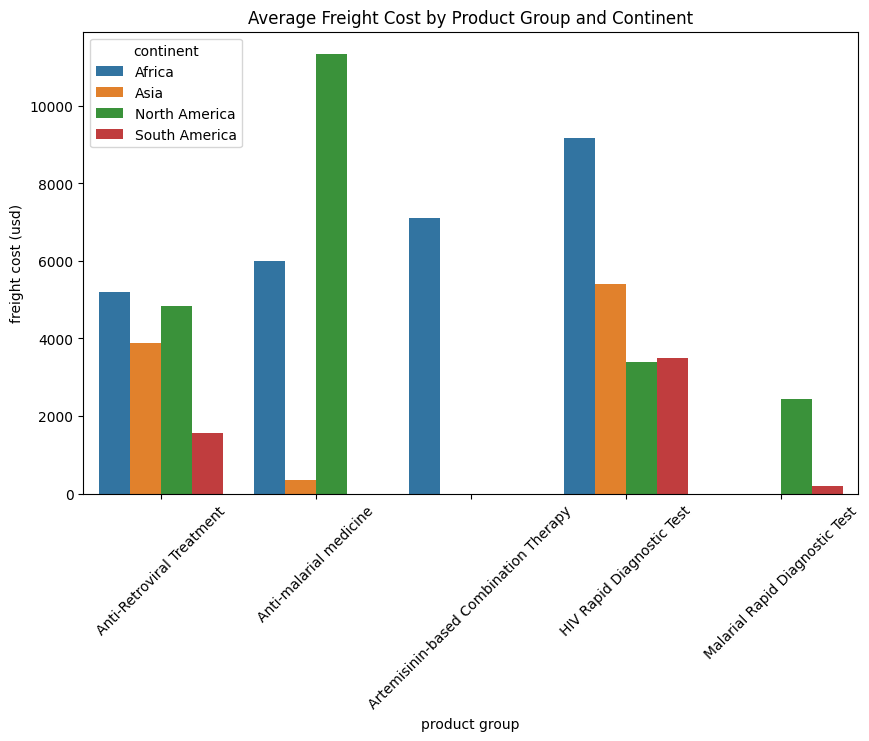

In [111]:
grouped_freight = df.groupby(['product group', 'continent'])['freight cost (usd)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='product group', y='freight cost (usd)', hue='continent', data=grouped_freight)
plt.title('Average Freight Cost by Product Group and Continent')
plt.xticks(rotation=45)
plt.show()




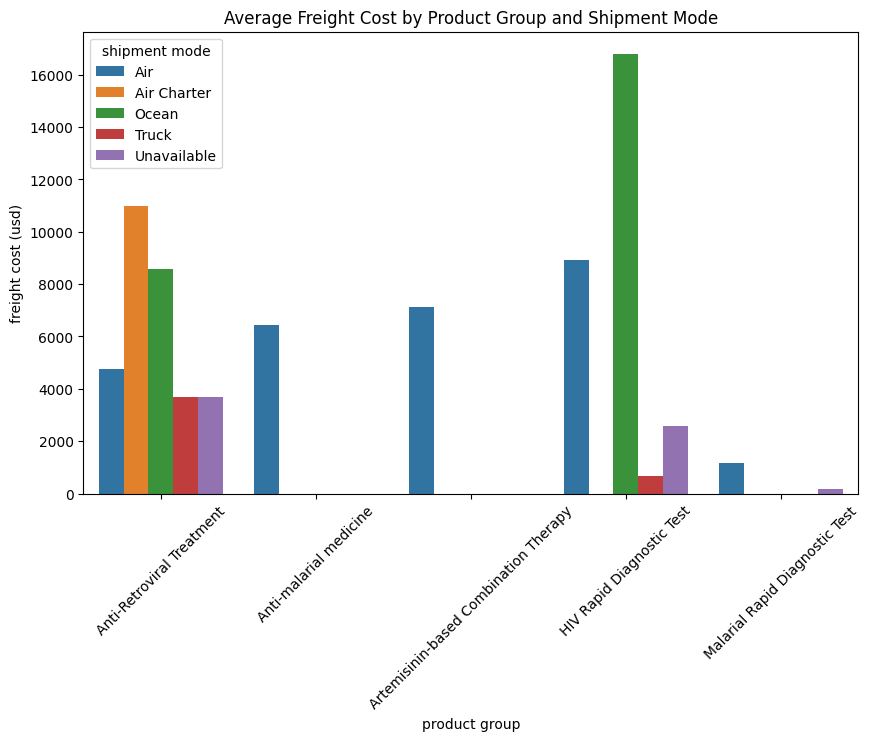

In [112]:
# Grouping data by 'product group' and 'shipment mode' and calculating average freight costs
grouped_freight = df.groupby(['product group', 'shipment mode'])['freight cost (usd)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='product group', y='freight cost (usd)', hue='shipment mode', data=grouped_freight)
plt.title('Average Freight Cost by Product Group and Shipment Mode')
plt.xticks(rotation=45)
plt.show()


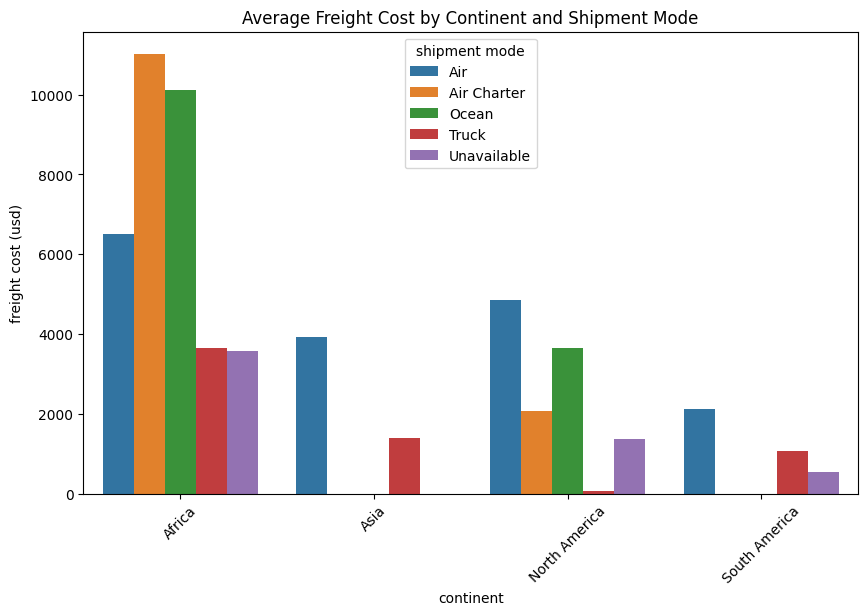

In [113]:
grouped_freight = df.groupby(['continent', 'shipment mode'])['freight cost (usd)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='freight cost (usd)', hue='shipment mode', data=grouped_freight)
plt.title('Average Freight Cost by Continent and Shipment Mode')
plt.xticks(rotation=45)
plt.show()

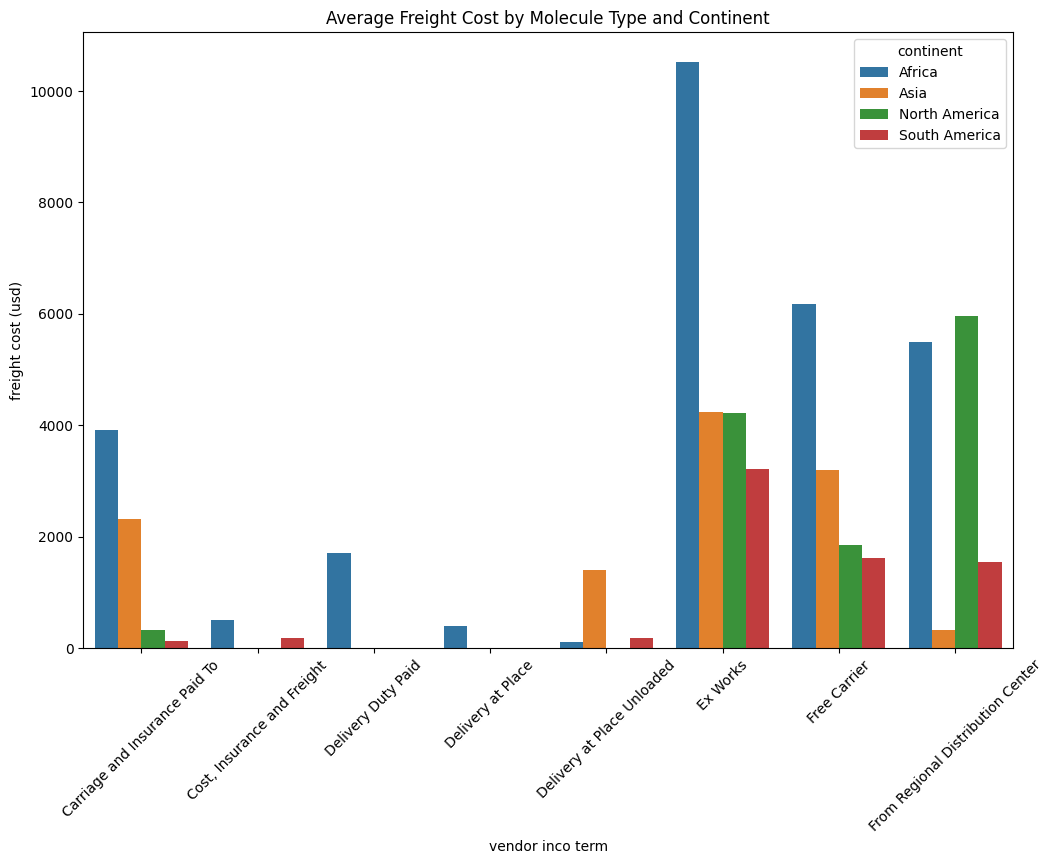

In [114]:
grouped_freight = df.groupby(['vendor inco term', 'continent'])['freight cost (usd)'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='vendor inco term', y='freight cost (usd)', hue='continent', data=grouped_freight)
plt.title('Average Freight Cost by Molecule Type and Continent')
plt.xticks(rotation=45)
plt.show()

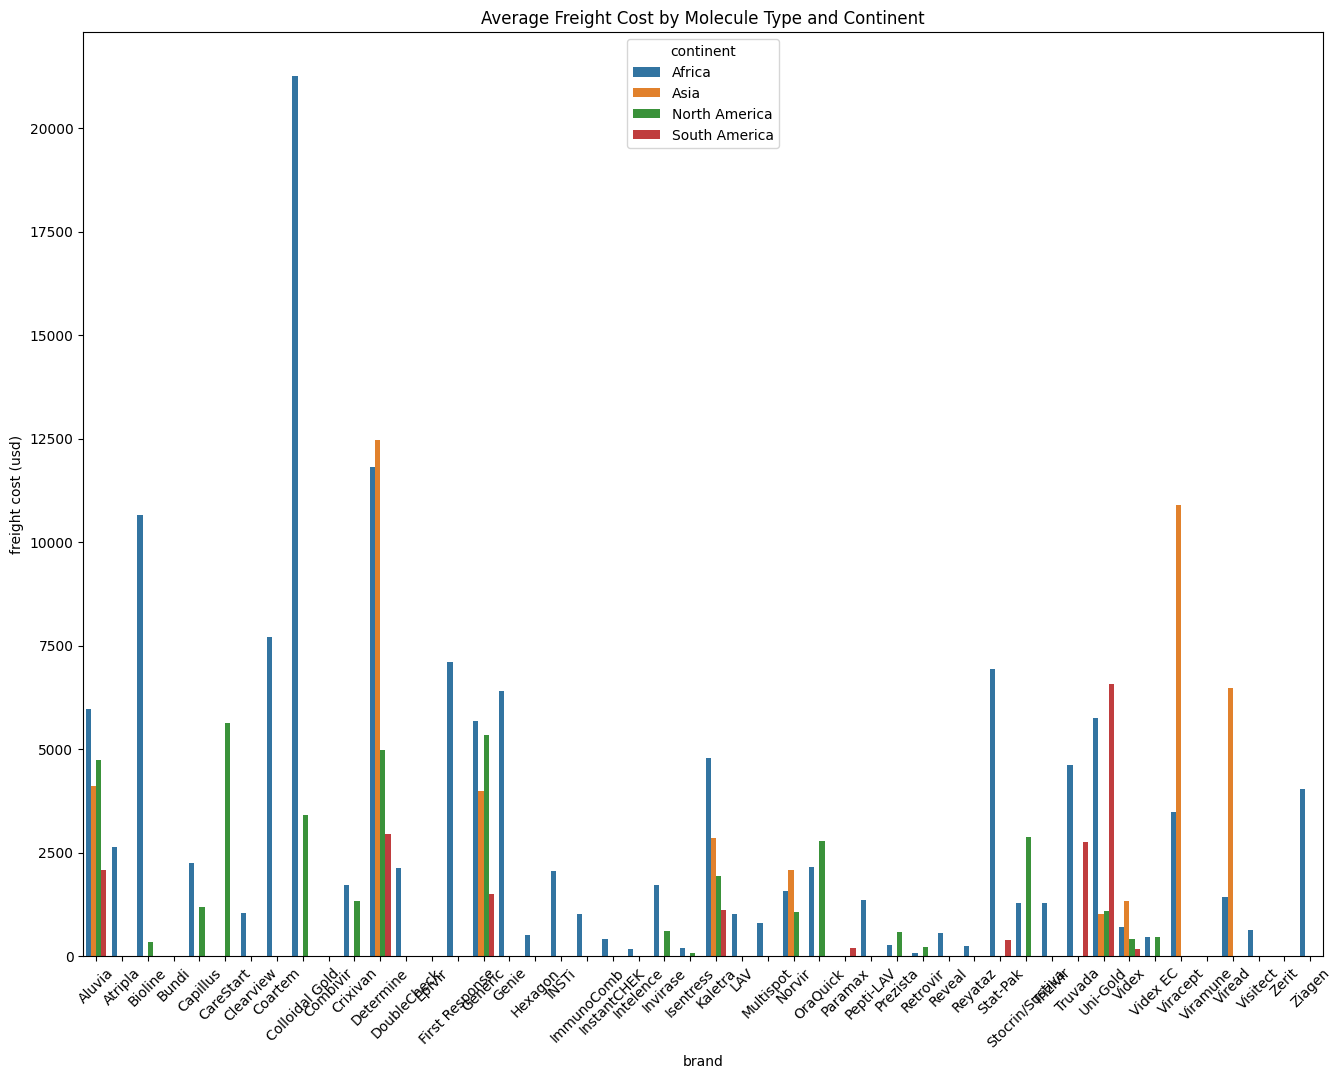

In [115]:
grouped_freight = df.groupby(['brand', 'continent'])['freight cost (usd)'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 12))
sns.barplot(x='brand', y='freight cost (usd)', hue='continent', data=grouped_freight)
plt.title('Average Freight Cost by Molecule Type and Continent')
plt.xticks(rotation=45)
plt.show()

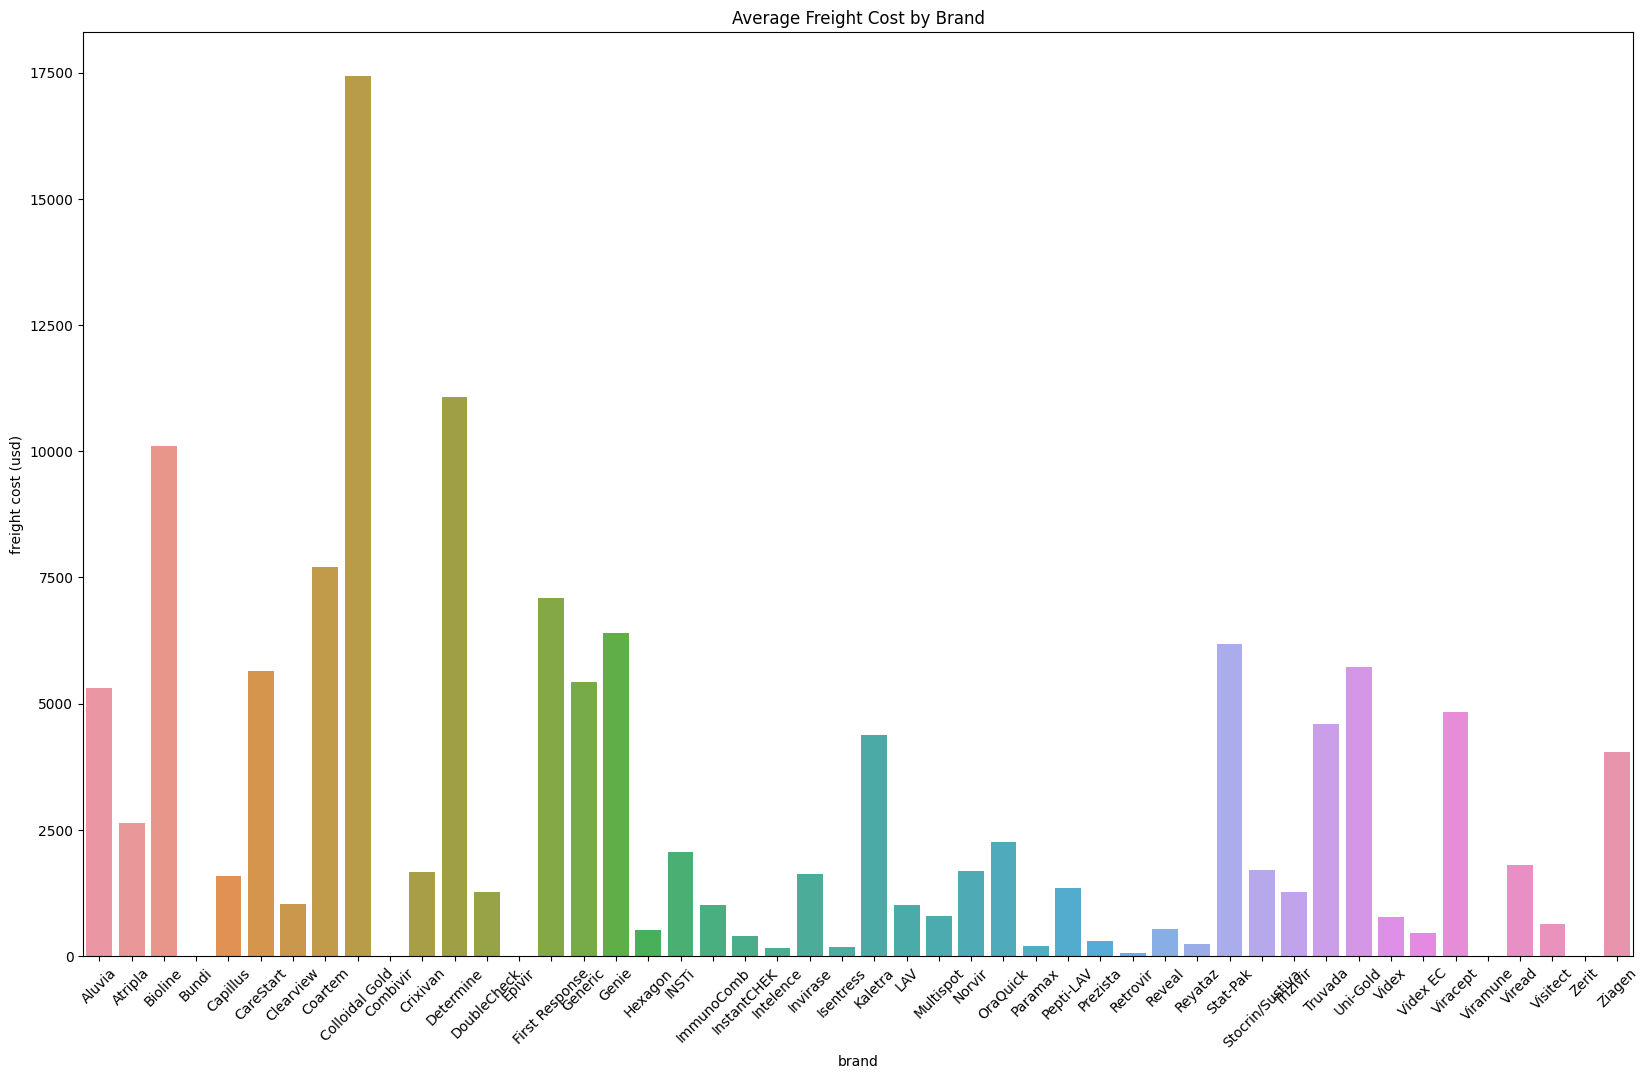

In [116]:
grouped_freight = df.groupby(['brand'])['freight cost (usd)'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 12))
sns.barplot(x='brand', y='freight cost (usd)', data=grouped_freight)
plt.title('Average Freight Cost by Brand')
plt.xticks(rotation=45)
plt.show()

In [117]:
group_cols = ['continent', 'product group']
item_cost_variation_by_group = analyze_item_costs_by_group(df, 'item description', 'unit price', group_cols)
print(item_cost_variation_by_group)

NameError: name 'analyze_item_costs_by_group' is not defined

In [ ]:
df.info()

Using Machine Learning to Predict Costs

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Separating features and target variable
X = df.drop(['freight cost (usd)','id','scheduled delivery date','sub classification','fulfill via','managed by','delivered to client date','item description','manufacturing site'], axis=1)
y = df['freight cost (usd)']

# Handling categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=100, random_state=0)

# Create and evaluate the pipeline
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_xgb)])


In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, train_size=0.5, test_size=0.5, random_state=0)


In [ ]:
# Fit the model
pipeline_xgb.fit(X_train, y_train)

# Predicting
preds = pipeline_xgb.predict(X_valid)

# Evaluation using different metrics
mae = mean_absolute_error(y_valid, preds)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
r2 = r2_score(y_valid, preds)
mape = mean_absolute_percentage_error(y_valid, preds)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'MAPE: {mape}')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rf)])

# Training and predictions
pipeline_rf.fit(X_train, y_train)
preds_rf = pipeline_rf.predict(X_valid)

# Evaluation
mae_rf = mean_absolute_error(y_valid, preds_rf)
rmse_rf = np.sqrt(mean_squared_error(y_valid, preds_rf))
r2_rf = r2_score(y_valid, preds_rf)
mape_rf = mean_absolute_percentage_error(y_valid, preds_rf)

print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R^2: {r2_rf}')
print(f'Random Forest MAPE: {mape_rf}')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pipeline_rf' is your previously defined pipeline with a Random Forest model
# Let's make sure to access the Random Forest model correctly and get the feature importances
feature_importances = pipeline_rf.named_steps['model'].feature_importances_

# Processing feature names for categorical variables after one-hot encoding
# OneHotEncoder transforms the categorical variables into a matrix of binaries (one-hot)
# Get the feature names from the one-hot encoder
ohe_categories = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

# Combine these new feature names with the original numerical column names
feature_names = np.concatenate([numerical_cols, ohe_categories])

# Ensure the number of feature names matches the number of importances
assert len(feature_importances) == len(feature_names), "Mismatch in the length of feature importances and names"



In [ ]:
# Create a DataFrame to hold feature names and their importance scores
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df.sort_values(by="Importance", ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importances_df.head(20))  # Modify here to limit the number of features displayed
plt.title('Top 20 Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# Grouping by country and calculate mean costs
mean_costs_by_country = df.groupby('country')['freight cost (usd)'].mean().reset_index()

# Finding the median costs by country
median_costs_by_country = df.groupby('country')['freight cost (usd)'].median().reset_index()

print(mean_costs_by_country)

In [ ]:
# Grouping by country and calculate mean costs
mean_costs_by_country = df.groupby('continent')['freight cost (usd)'].mean().reset_index()

# Finding the median costs by country
median_costs_by_country = df.groupby('continent')['freight cost (usd)'].median().reset_index()

print(mean_costs_by_country)

In [ ]:
# Grouping by shipment mode and calculating mean costs
mean_costs_by_mode = df.groupby('shipment mode')['freight cost (usd)'].mean().reset_index()
mean_costs_by_mode

In [122]:
import pandas as pd

def analyze_item_costs(df, item_col, cost_col, country_col):
    """
    Analyze the cost variation of items across different countries.

    Args:
    df (DataFrame): The dataframe containing the supply chain data.
    item_col (str): Column name for item descriptions or unique identifiers.
    cost_col (str): Column name for the cost metric to analyze.
    country_col (str): Column name for country.

    Returns:
    DataFrame: A dataframe with cost statistics for each item by country.
    """
    grouped = df.groupby([item_col, country_col])[cost_col].agg(['mean', 'std']).reset_index()
    return grouped

# Example usage:
item_cost_variation = analyze_item_costs(df, 'item description', 'unit price', 'country')
print(item_cost_variation)


                                       item description        country  \
0     #102198**Didanosine 200mg [Videx], tablets, 60...  Côte d'Ivoire   
1     #102198**Didanosine 200mg [Videx], tablets, 60...       Zimbabwe   
2     #108853** HIV, Genie II HIV-1/HIV-2 Kit, 40 Tests  Côte d'Ivoire   
3     #108853** HIV, Genie II HIV-1/HIV-2 Kit, 40 Tests        Nigeria   
4          #109435**HIV, OraQuick Controls Kit, 3 Vials       Botswana   
...                                                 ...            ...   
1007                 Zidovudine 300mg, tablets, 60 Tabs       Tanzania   
1008                 Zidovudine 300mg, tablets, 60 Tabs         Uganda   
1009                 Zidovudine 300mg, tablets, 60 Tabs        Vietnam   
1010                 Zidovudine 300mg, tablets, 60 Tabs         Zambia   
1011                 Zidovudine 300mg, tablets, 60 Tabs       Zimbabwe   

          mean       std  
0     0.420000  0.000000  
1     0.420000  0.000000  
2     1.600000  0.000000  
3  

In [126]:
#grouping by product group and calculating the mean costs
mean_costs_by_product_group = df.groupby('product group')['freight cost (usd)'].mean().reset_index()

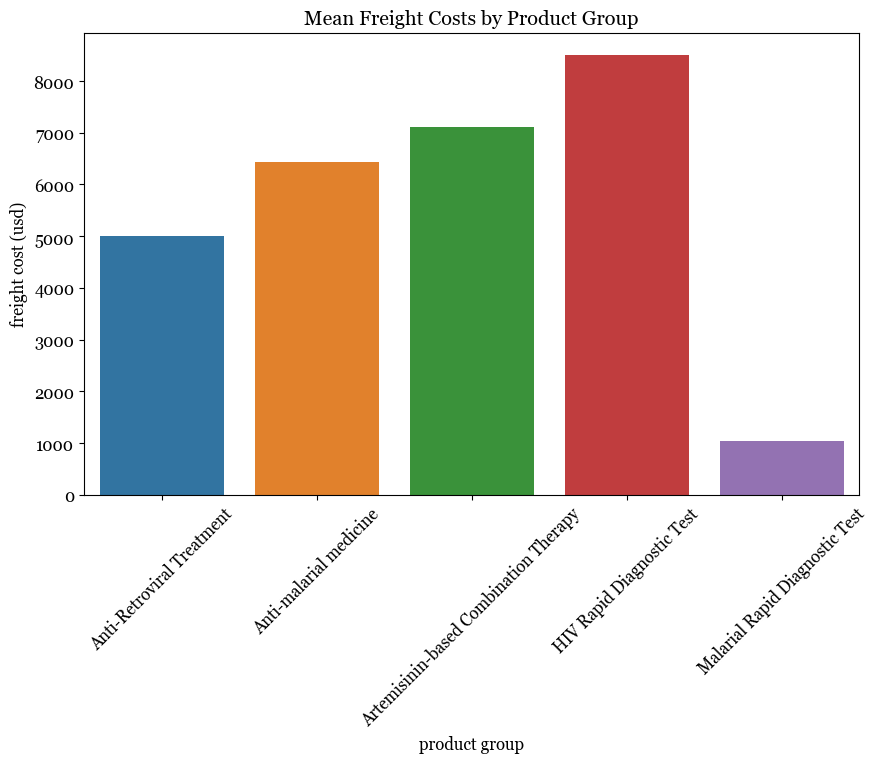

In [135]:
# Costs by Shipment Mode
plt.figure(figsize=(10, 6))
sns.barplot(x='product group', y='freight cost (usd)', data=mean_costs_by_product_group)
plt.title('Mean Freight Costs by Product Group')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

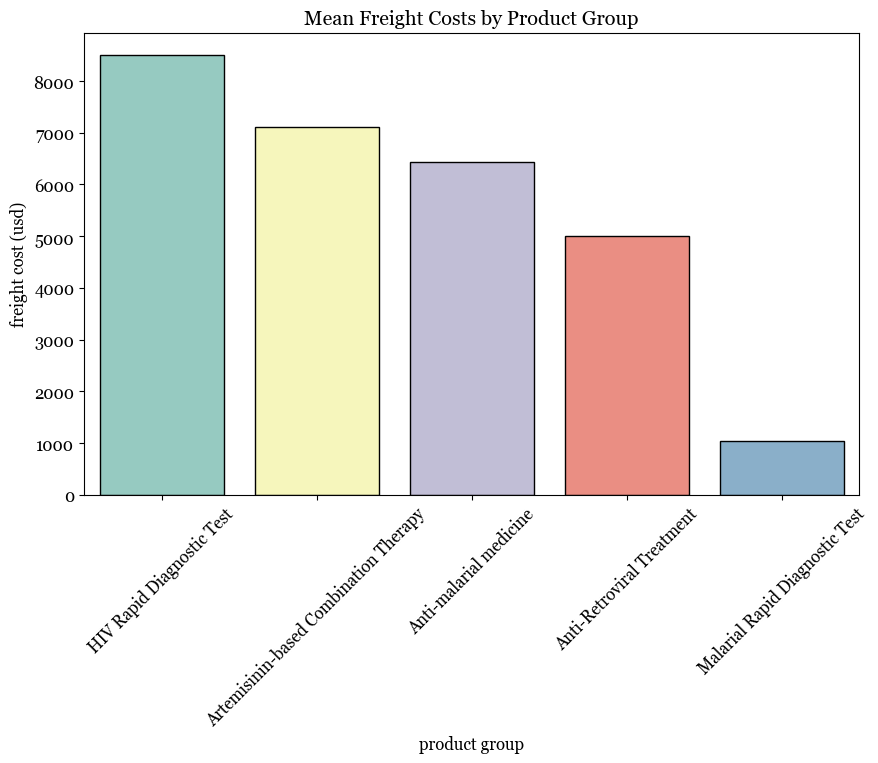

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame in descending order by 'freight cost (usd)'
mean_costs_by_product_group_sorted = mean_costs_by_product_group.sort_values('freight cost (usd)', ascending=False)

plt.figure(figsize=(10, 6))

# Load the Set3 colormap
set3 = sns.color_palette("Set3", len(mean_costs_by_product_group_sorted['product group'].unique()))

# Create a barplot with Seaborn and apply the Set3 colormap and add edgecolor for the black line
sns.barplot(x='product group', y='freight cost (usd)', data=mean_costs_by_product_group_sorted, palette=set3, edgecolor='black')

plt.title('Mean Freight Costs by Product Group')
plt.xticks(rotation=45)  # Rotate x labels if they overlap

# Make the figure background transparent
plt.gca().set_facecolor("none")
plt.gcf().patch.set_alpha(0.0)

plt.show()


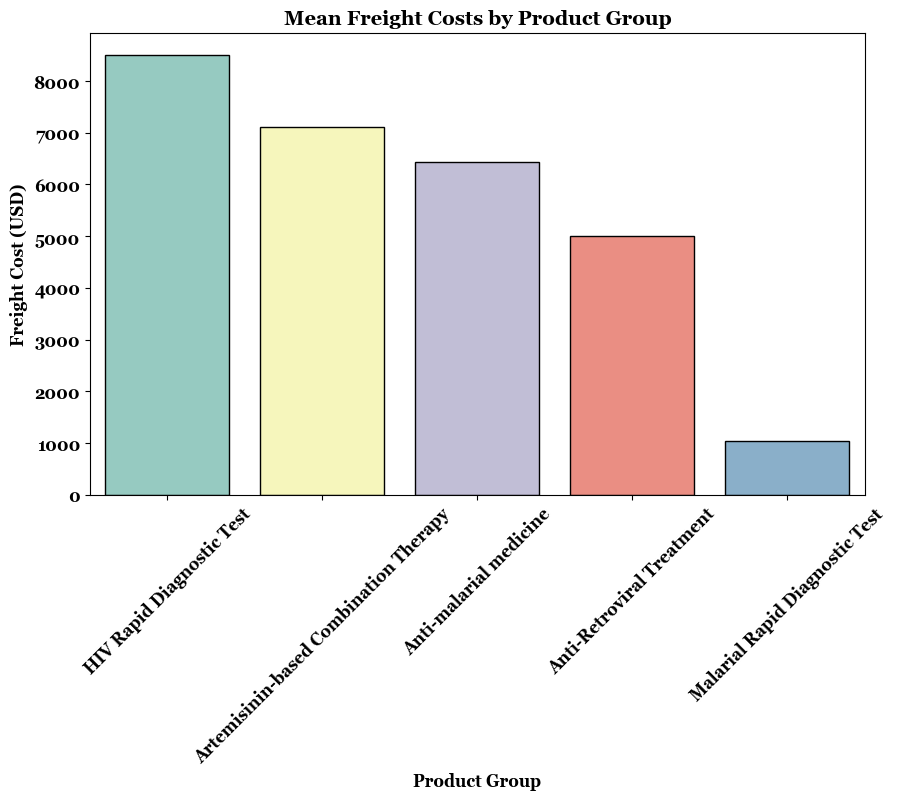

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame in descending order by 'freight cost (usd)'
mean_costs_by_product_group_sorted = mean_costs_by_product_group.sort_values('freight cost (usd)', ascending=False)

plt.figure(figsize=(10, 6))

# Load the Set3 colormap
set3 = sns.color_palette("Set3", len(mean_costs_by_product_group_sorted['product group'].unique()))

# Create a barplot with Seaborn and apply the Set3 colormap and add edgecolor for the black line
sns.barplot(x='product group', y='freight cost (usd)', data=mean_costs_by_product_group_sorted, palette=set3, edgecolor='black')

plt.title('Mean Freight Costs by Product Group', fontweight='bold')
plt.xlabel('Product Group', fontweight='bold')
plt.ylabel('Freight Cost (USD)', fontweight='bold')

# Make the tick labels bold
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')

# Make the figure background transparent
plt.gca().set_facecolor("none")
plt.gcf().patch.set_alpha(0.0)

plt.show()


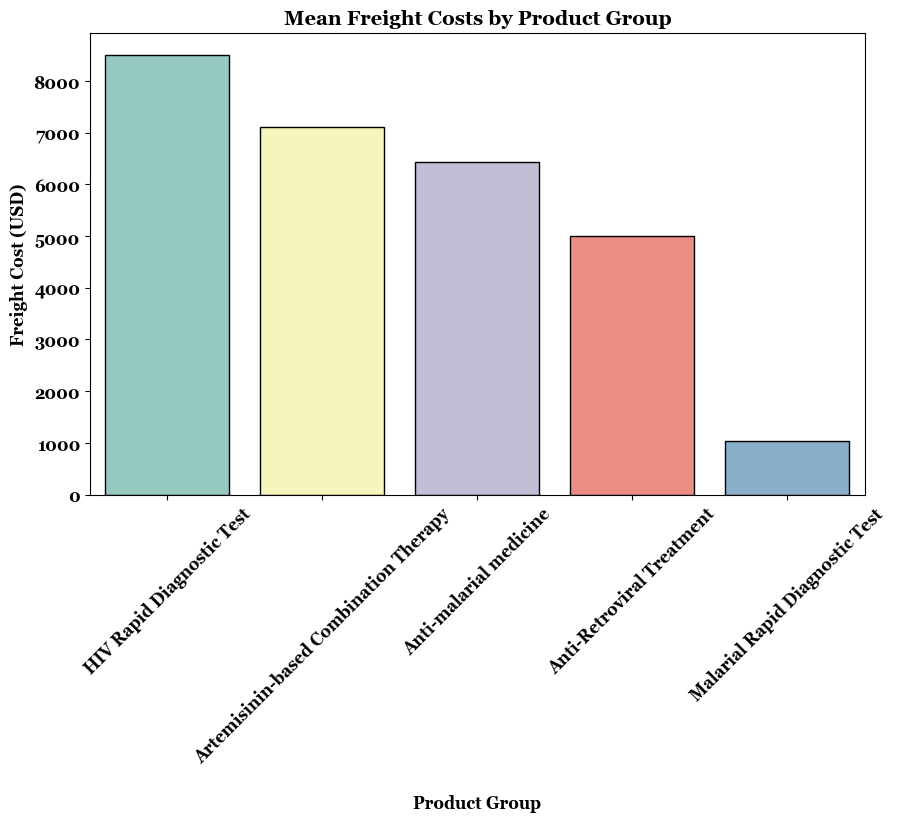

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame in descending order by 'freight cost (usd)'
mean_costs_by_product_group_sorted = mean_costs_by_product_group.sort_values('freight cost (usd)', ascending=False)

plt.figure(figsize=(10, 6))

# Load the Set3 colormap
set3 = sns.color_palette("Set3", len(mean_costs_by_product_group_sorted['product group'].unique()))

# Create a barplot with Seaborn and apply the Set3 colormap and add edgecolor for the black line
sns.barplot(x='product group', y='freight cost (usd)', data=mean_costs_by_product_group_sorted, palette=set3, edgecolor='black')

plt.title('Mean Freight Costs by Product Group', fontweight='bold')
plt.xlabel('Product Group', fontweight='bold', labelpad=20)  # Adjust labelpad as needed
plt.ylabel('Freight Cost (USD)', fontweight='bold')

# Manually adjust x-axis label position if needed
#ax = plt.gca()
#ax.xaxis.label.set_position((0.0, 0.00)) # (x, y) position tuple

# Make the tick labels bold
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')

# Make the figure background transparent
plt.gca().set_facecolor("none")
plt.gcf().patch.set_alpha(0.0)

plt.show()


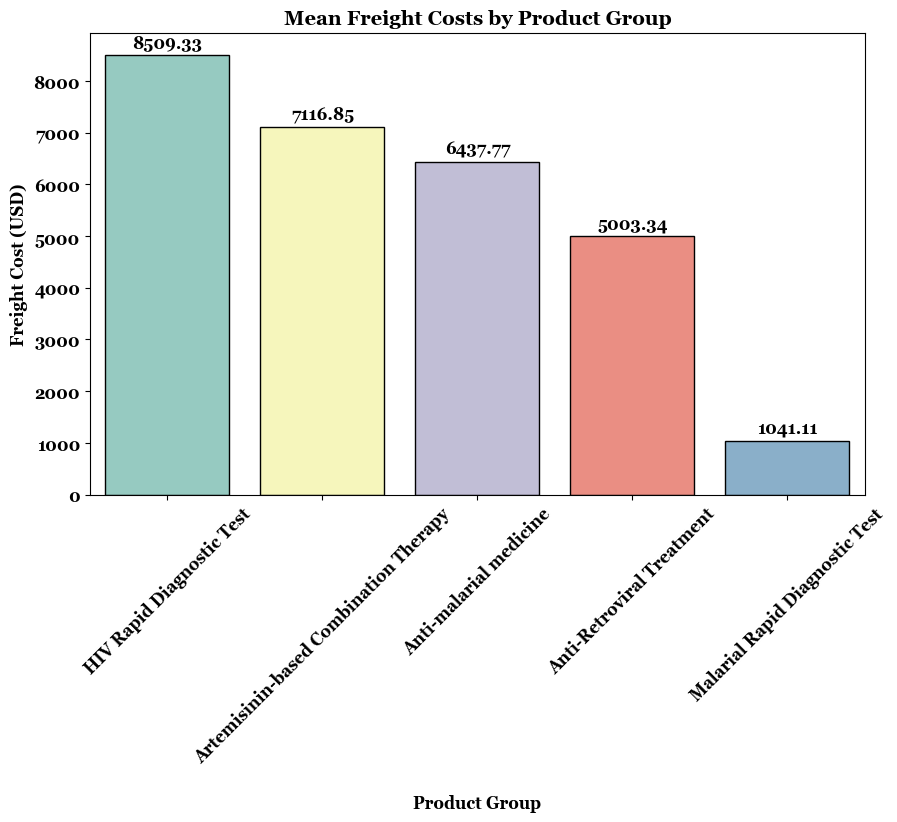

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame in descending order by 'freight cost (usd)'
mean_costs_by_product_group_sorted = mean_costs_by_product_group.sort_values('freight cost (usd)', ascending=False)

plt.figure(figsize=(10, 6))

# Load the Set3 colormap
set3 = sns.color_palette("Set3", len(mean_costs_by_product_group_sorted['product group'].unique()))

# Create a barplot with Seaborn and apply the Set3 colormap and add edgecolor for the black line
barplot = sns.barplot(x='product group', y='freight cost (usd)', data=mean_costs_by_product_group_sorted, palette=set3, edgecolor='black')

plt.title('Mean Freight Costs by Product Group', fontweight='bold')
plt.xlabel('Product Group', fontweight='bold', labelpad=20)
plt.ylabel('Freight Cost (USD)', fontweight='bold')

# Make the tick labels bold
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')

# Adding value labels in bold inside the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontweight='bold')

# Make the figure background transparent
plt.gca().set_facecolor("none")
plt.gcf().patch.set_alpha(0.0)

plt.show()


In [ ]:
#costs by product_group
plt.figure(figsize=(12, 8)) 
sns.barplot(x='product group', y='freight cost (usd)', data=mean_costs_by_product_group, palette='muted')
plt.title('Mean Freight Costs by Product Group')
plt.xlabel('Product Group')
plt.ylabel('Mean Freight Cost (USD)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='line item value', y='freight cost (usd)')
plt.title('Freight Cost (USD) vs. Line Item Value')
plt.xlabel('Line Item Value')
plt.ylabel('Freight Cost (USD)')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Function to generate an outlier report
def outlier_report(df):
    report = []
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        zs = zscore(df[col])
        possible_outliers = ((zs >= 2) & (zs < 3)).sum()
        definite_outliers = (zs >= 3).sum()
        report.append({
            'Numerical Variable': col,
            'Possible Outliers': possible_outliers,
            'Definite Outliers': definite_outliers,
            'Total Outliers': possible_outliers + definite_outliers
        })
    return pd.DataFrame(report)

# Function to apply winsorization to all numerical columns in the DataFrame
def winsorize_dataframe(df, limits=(0.01, 0.01)):
    winsorized_df = df.copy()  # Creating a copy to avoid changing the original DataFrame
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_cols:
        # Applying winsorization
        winsorized_data = winsorize(df[col], limits=limits)
        winsorized_df[col] = winsorized_data
    
    return winsorized_df

# Applying the winsorization function to the DataFrame
df_winsorized = winsorize_dataframe(df, limits=(0.01, 0.01))



In [ ]:
plot_and_analyze_data(df_winsorized, 'line item quantity')

In [ ]:
plot_and_analyze_data(df_winsorized, 'weight (kilograms)')

In [ ]:
plot_and_analyze_data(df_winsorized, 'unit of measure (per pack)')

4. **Country-Specific Insights**: Are there specific countries with notably higher or lower shipping costs or quantities, and what might be the reasons (e.g., local regulations, distance)?

In [ ]:
df.info()

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_freight_costs(df):
    # Calculate the mean freight cost per country
    mean_freight_costs = df.groupby('country')['freight cost (usd)'].mean()
    
    # Sort the costs in descending order and get the top 5 countries
    top_countries = mean_freight_costs.sort_values(ascending=False).head(5)
    
    # Use a playful and bright color palette
    bar_colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99']
    
    # Plotting the results with a transparent background
    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_countries.index, top_countries.values, color=bar_colors, edgecolor='black')
    
    # Rounding the bar edges for a softer look
    for bar in bars:
        bar.set_linewidth(1.5)
        # Set a high zorder to ensure the edges are not hidden behind the bars
        bar.set_zorder(3)

    # Customize the font to Georgia
    font = {'fontname': 'Georgia', 'fontweight': 'bold'}

    # Set axis labels and title with the Georgia font
    plt.xlabel('Average Freight Cost (USD)', fontsize=14, **font, color='black')
    plt.ylabel('Country', fontsize=14, **font, color='black')
    plt.title('Top 5 Countries by Average Freight Cost', fontsize=16, **font, color='black')
    
    # Customize tick parameters with the Georgia font
    plt.xticks(fontsize=12, **font, color='black')
    plt.yticks(fontsize=12, **font, color='black')

    # Adding the value labels on the bars with the Georgia font
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 '{:.2f}'.format(bar.get_width()), va='center', ha='right',
                 fontsize=12, **font, color='black')

    plt.gca().invert_yaxis()  # to display the country with the highest cost at the top
    plt.gca().set_facecolor('none')  # Set axes background color to none (transparent)

# Example usage, assuming 'df' is your DataFrame:
# plot_top_freight_costs(df)


    

 
    plt.savefig('/Users/USER/Downloads/Scripting Images/aa.png',transparent=True)  # Save with transparency
    plt.show()

# Example usage, assuming 'df' is your DataFrame:
# plot_top_freight_costs(df)






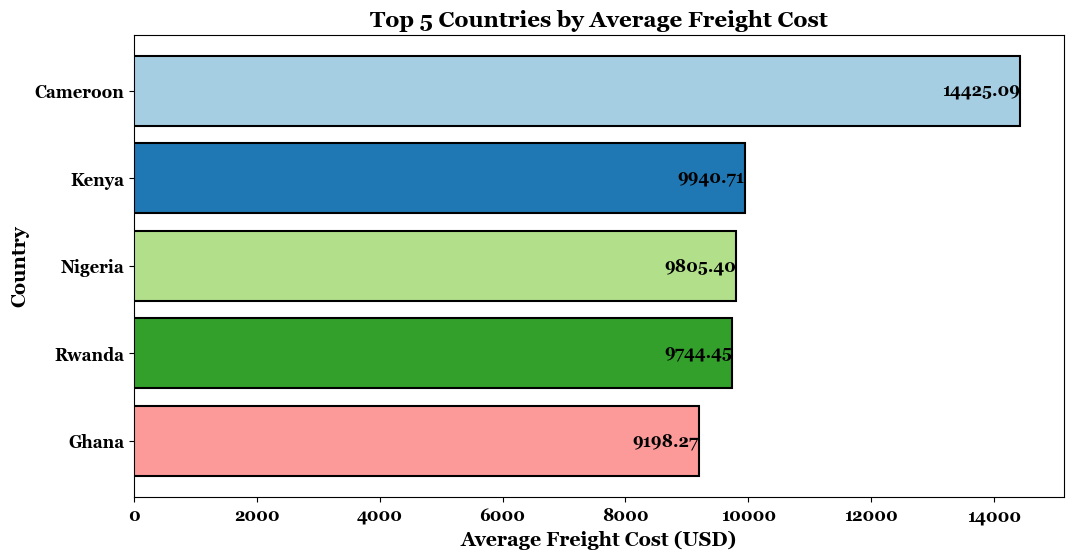

In [129]:
plot_top_freight_costs(df)

In [133]:
def plot_top_freight_costs_mode(df):
    # Calculate the mean freight cost per country
    mean_freight_costs = df.groupby(['country', 'shipment mode'])['freight cost (usd)'].mean()
    
    # Sort the costs in descending order and get the top 5 countries
    top_countries = mean_freight_costs.sort_values(ascending=False).head(5)
    
    # Plotting the results
    plt.figure(figsize=(10, 5))
    top_countries.plot(kind='barh', color='skyblue')
    plt.xlabel('Average Freight Cost (USD)')
    plt.ylabel('Country')
    plt.title('Top 5 Countries by Average Freight Cost based on Shipment Mode')
    plt.gca().invert_yaxis()  # to display the country with the highest cost at the top
    plt.show()

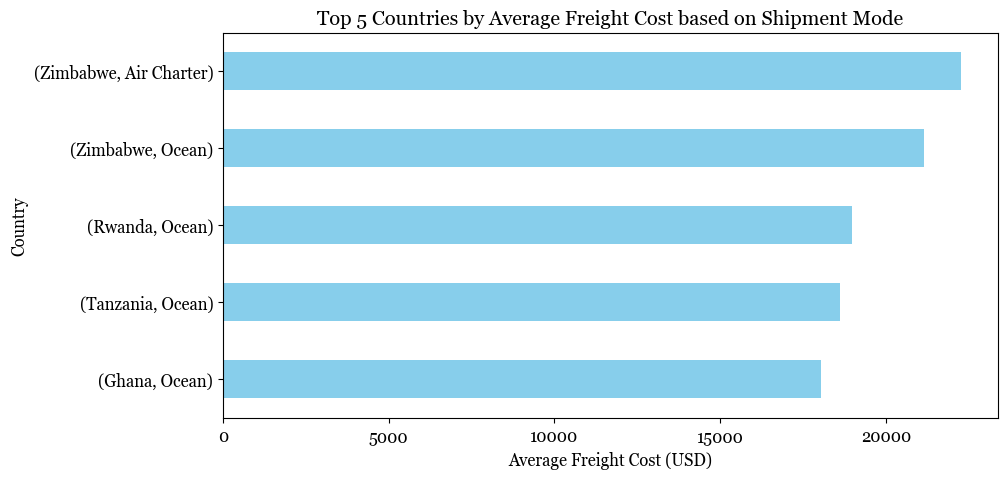

In [134]:
plot_top_freight_costs_mode(df)

In [130]:
def plot_top_freight_costs_product(df):
    # Calculate the mean freight cost per country
    mean_freight_costs = df.groupby(['country', 'product group'])['freight cost (usd)'].mean()
    
    # Sort the costs in descending order and get the top 5 countries
    top_countries = mean_freight_costs.sort_values(ascending=False).head(5)
    
    # Plotting the results
    plt.figure(figsize=(10, 5))
    top_countries.plot(kind='barh', color='skyblue')
    plt.xlabel('Average Freight Cost (USD)')
    plt.ylabel('Country')
    plt.title('Top 5 Countries by Average Freight Cost based on Shipment Mode')
    plt.gca().invert_yaxis()  # to display the country with the highest cost at the top
    plt.show()

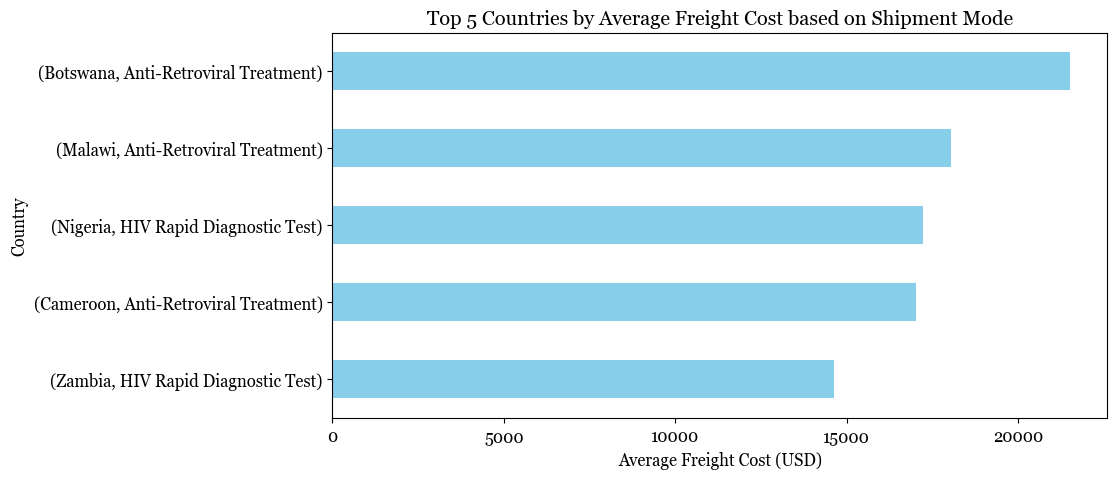

In [131]:
plot_top_freight_costs_product(df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_freight_costs_by_continent(df):
    continents = df['continent'].unique()  # Get the list of all continents in the dataframe
    fig, axes = plt.subplots(nrows=len(continents), ncols=1, figsize=(10, 5 * len(continents)))  # Prepare subplots for each continent

    for idx, continent in enumerate(continents):
        # Filter data for the current continent
        continent_data = df[df['continent'] == continent]
        
        # Calculate the mean freight cost per country in the continent
        mean_freight_costs = continent_data.groupby('country')['freight cost (usd)'].mean()
        
        # Sort the costs in descending order and get the top 3 countries
        top_countries = mean_freight_costs.sort_values(ascending=False).head(3)
        
        # Plotting the results for the current continent
        ax = axes[idx] if len(continents) > 1 else axes
        top_countries.plot(kind='barh', color='skyblue', ax=ax)
        ax.set_xlabel('Average Freight Cost (USD)')
        ax.set_ylabel('Country')
        ax.set_title(f'Top 3 Countries by Average Freight Cost in {continent}')
        ax.invert_yaxis()  # Display the country with the highest cost at the top

    plt.tight_layout()
    plt.show()




In [ ]:
plot_top_freight_costs_by_continent(df)

In [ ]:
def plot_top_freight_costs_vendor(df):
    # Calculate the mean freight cost per country
    mean_freight_costs = df.groupby(['country', 'vendor'])['freight cost (usd)'].mean()
    
    # Sort the costs in descending order and get the top 5 countries
    top_countries = mean_freight_costs.sort_values(ascending=False).head(5)
    
    # Plotting the results
    plt.figure(figsize=(10, 5))
    top_countries.plot(kind='barh', color='skyblue')
    plt.xlabel('Average Freight Cost (USD)')
    plt.ylabel('Country')
    plt.title('Top 5 Countries by Average Freight Cost based on Vendor')
    plt.gca().invert_yaxis()  # to display the country with the highest cost at the top
    plt.show()

In [ ]:
plot_top_freight_costs_vendor(df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_freight_costs_vs_days(df):
    # Ensure you're working with a DataFrame where the relevant data is non-null.
    df = df.dropna(subset=['days between scheduled and delivered', 'freight cost (usd)', 'country'])
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    
    # Group data by country to plot each country as a unique color
    groups = df.groupby('country')
    for name, group in groups:
        plt.scatter(group['days between scheduled and delivered'], group['freight cost (usd)'], label=name, s=50, alpha=0.7)

    plt.xlabel('Days Between Scheduled Delivery and Recorded Delivery')
    plt.ylabel('Freight Cost (USD)')
    plt.title('Scatter Plot of Freight Costs vs. Days Between Delivery by Country')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
    plt.grid(True)
    
    plt.show()

# Example usage, assuming 'df' is your DataFrame:
# plot_freight_costs_vs_days(df)


In [ ]:
plot_freight_costs_vs_days(df)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df has columns 'country' and 'freight_cost_usd' for each shipment
# Sample DataFrame setup
# df = pd.DataFrame({
#     'country': ['France', 'Germany', 'China', 'USA', 'Brazil'],
#     'freight_cost_usd': [1000, 1500, 2000, 1800, 1600]
# })

# Calculate average freight cost per country
average_freight_cost = df.groupby('country')['freight cost (usd)'].mean().reset_index()

# Load the built-in Natural Earth dataset via Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the average freight costs with the world GeoDataFrame
world = world.merge(average_freight_cost, left_on='name', right_on='country', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
ax.set_facecolor((0, 0, 0, 0))  # Set axes background color to transparent (RGBA)

# Define a vibrant and flat color scheme
cmap = plt.cm.get_cmap('viridis', 10)  # Using 'viridis' for a different aesthetic

# Plot the countries using the average freight cost
world.plot(column='freight cost (usd)', ax=ax, legend=True,
           cmap=cmap,  # Apply the vibrant colormap
           legend_kwds={'label': "Average Freight Cost (USD)", 'orientation': "horizontal"},
           missing_kwds={'color': 'skyblue', 'edgecolor': 'black',
                         'label': 'Missing values'})

# Adding thin black borders for a cleaner, flat look
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')

# Hide axes details
plt.xlabel('Longitude', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Latitude', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.axis('off')  # Turn off the axis

# Saving the figure with full transparency
plt.savefig('/Users/USER/Downloads/Scripting Images/bb.png',transparent=True)  # Save with transparency
plt.show()


In [ ]:
!PIP install geopandas

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

def transactions_per_continent(df):
    # Counting the number of transactions (rows) per continent
    transaction_counts = df['continent'].value_counts()
    
    # Creating a plot with explicit transparency settings
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'aspect': 'equal'}, facecolor=(0, 0, 0, 0))  # Transparent figure background
    ax.set_facecolor((0, 0, 0, 0))  # Transparent axes background

    # Plotting pie chart
    wedges, texts, autotexts = ax.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=140,
                                      colors=plt.cm.Set3(range(len(transaction_counts))), # Using Set3 colormap for vibrant, distinct colors
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

    # Setting font properties for all text to Georgia
    georgia_font = {'fontname': 'Georgia', 'fontweight': 'bold'}
    for text in texts:
        text.set_fontweight('bold')
        text.set_fontname('Georgia')
    for autotext in autotexts:
        autotext.set_fontweight('bold')
        autotext.set_fontname('Georgia')

    # Set overall title with Georgia font
    plt.title('Transactions Per Continent', **georgia_font)

    # Making the spines (frame of the plot) bold and black
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_edgecolor('black')

    # Show plot
    plt.tight_layout()
    plt.show()

    # Save the figure with full transparency
    fig.savefig('/Users/USER/Downloads/Scripting Images/ba.png', transparent=True, bbox_inches='tight', pad_inches=0, format='png')

    return transaction_counts

# Example use case
# df = pd.DataFrame({'continent': ['Europe', 'Asia', 'North America', 'Europe', 'Asia', 'Africa']})
# transaction_counts = transactions_per_continent(df)
# print(transaction_counts)


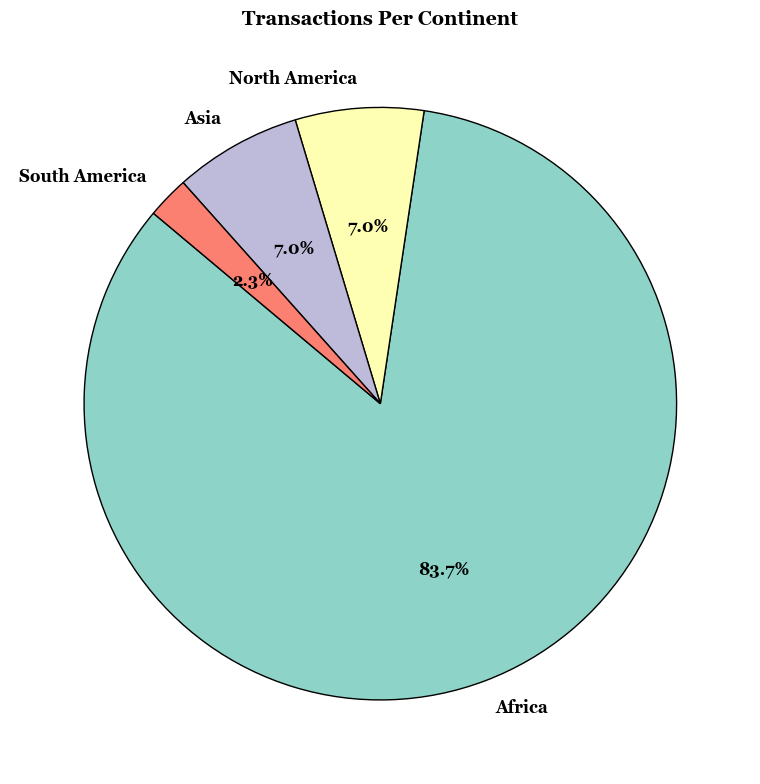

continent
Africa           8646
North America     723
Asia              718
South America     237
Name: count, dtype: int64

In [150]:
transactions_per_continent(df)

In [149]:
import matplotlib.pyplot as plt
import pandas as pd

def transactions_per_continent(df):
    # Counting the number of transactions (rows) per continent
    transaction_counts = df['continent'].value_counts()
    
    # Creating a plot with explicit transparency settings
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'aspect': 'equal'}, facecolor=(0, 0, 0, 0))  # Transparent figure background
    ax.set_facecolor((0, 0, 0, 0))  # Transparent axes background

    # Plotting pie chart
    wedges, texts, autotexts = ax.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=140,
                                      colors=plt.cm.Set3(range(len(transaction_counts))), # Using Set3 colormap for vibrant, distinct colors
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

    # Setting font properties for all text to Georgia and making size larger
    georgia_font = {'fontname': 'Georgia', 'fontweight': 'bold', 'fontsize': 14}  # Increase fontsize as per your preference
    
    # Apply font properties and increase font size for labels and percentages
    for text in texts + autotexts:
        text.set_fontweight('bold')
        text.set_fontname('Georgia')
        text.set_fontsize(12)  # Increase label fontsize as per your preference
    
    # Set overall title with Georgia font and increased size
    plt.title('Transactions Per Continent', **georgia_font)

    # Making the spines (frame of the plot) bold and black
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_edgecolor('black')

    # Show plot
    plt.tight_layout()
    plt.show()

    # Save the figure with full transparency
    fig.savefig('/Users/USER/Downloads/Scripting Images/baa.png', transparent=True, bbox_inches='tight', pad_inches=0, format='png')

    return transaction_counts

# Example use case
# Assuming you have a DataFrame 'df' with a column 'continent' you can pass it to this function
# transaction_counts = transactions_per_continent(df)
# print(transaction_counts)


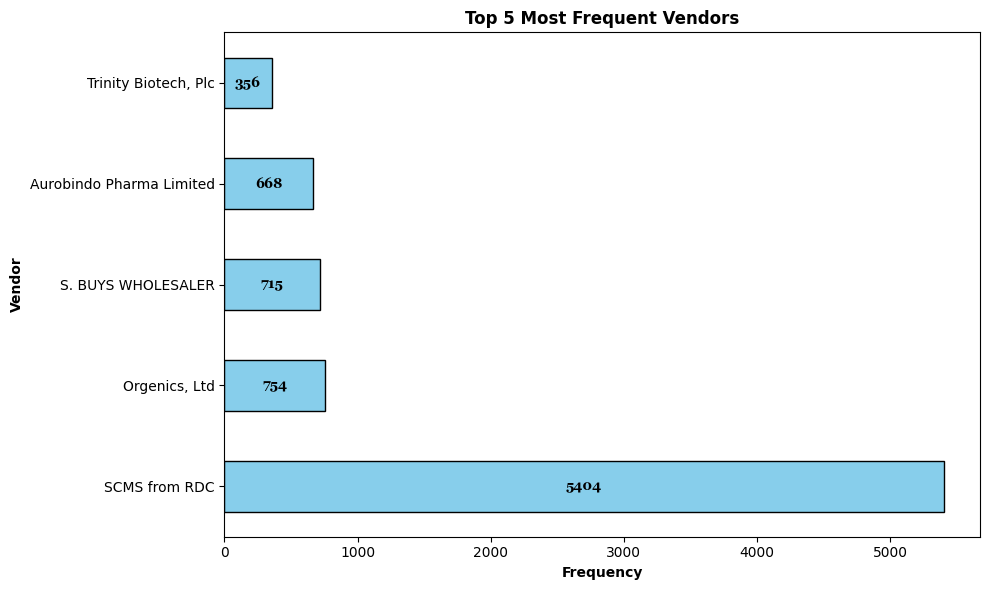

vendor
SCMS from RDC               5404
Orgenics, Ltd                754
S. BUYS WHOLESALER           715
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: count, dtype: int64


In [119]:
import matplotlib.pyplot as plt

def top_vendors_by_frequency(df):
    # Counting occurrences of each vendor and getting top 5
    top_vendors = df['vendor'].value_counts().head(5)

    # Plotting horizontal bar graph
    plt.figure(figsize=(10, 6))
    ax = top_vendors.plot(kind='barh', color='skyblue', edgecolor='black')  # Adding edgecolor for black line around bars

    # Setting the font globally to Georgia
    plt.rcParams['font.family'] = 'Georgia'

    plt.title("Top 5 Most Frequent Vendors", fontweight='bold')
    plt.xlabel("Frequency", fontweight='bold')
    plt.ylabel("Vendor", fontweight='bold')

    # Adding value labels in the center of each bar and bolding the text
    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y() + 0.5*i.get_height(), str(round(i.get_width(), 2)),
                va='center', ha='center', color='black', fontweight='bold')

    plt.tight_layout()

    # Setting the background to be transparent
    plt.gca().set_facecolor("none")
    plt.gcf().set_facecolor("none")

    plt.show()

    return top_vendors

# Assuming your DataFrame is named 'df'
top_vendors = top_vendors_by_frequency(df)
print(top_vendors)


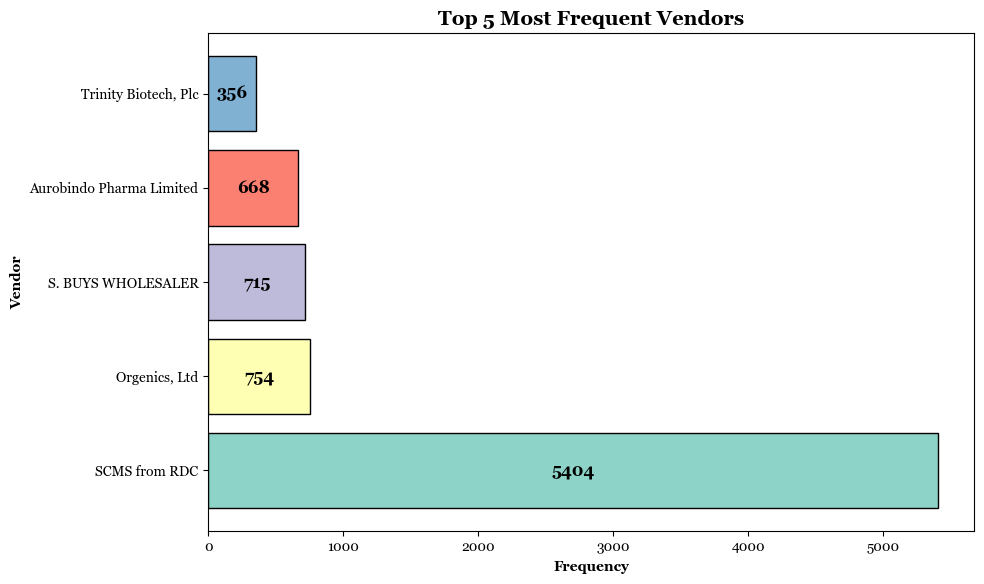

vendor
SCMS from RDC               5404
Orgenics, Ltd                754
S. BUYS WHOLESALER           715
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: count, dtype: int64


In [120]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def top_vendors_by_frequency(df):
    # Counting occurrences of each vendor and getting top 5
    top_vendors = df['vendor'].value_counts().head(5)

    # Set3 color map
    set3 = plt.get_cmap('Set3')

    # Number of bars to plot
    num_bars = len(top_vendors)

    # Plotting horizontal bar graph
    plt.figure(figsize=(10, 6))
    
    # Use the Set3 color map for bars
    bars = plt.barh(top_vendors.index, top_vendors.values, color=set3.colors[:num_bars], edgecolor='black')

    # Setting the font globally to Georgia
    plt.rcParams['font.family'] = 'Georgia'
    plt.rcParams['font.size'] = 12  # Adjust font size as needed

    plt.title("Top 5 Most Frequent Vendors", fontweight='bold')
    plt.xlabel("Frequency", fontweight='bold')
    plt.ylabel("Vendor", fontweight='bold')

    # Adding value labels in the center of each bar and bolding the text
    for bar in bars:
        plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2, str(round(bar.get_width(), 2)),
                 va='center', ha='center', color='black', fontweight='bold')

    plt.tight_layout()

    # Setting the background to be transparent
    plt.gca().set_facecolor("none")
    plt.gcf().set_facecolor("none")

    plt.show()

    return top_vendors

# Assuming your DataFrame is named 'df'
top_vendors = top_vendors_by_frequency(df)
print(top_vendors)


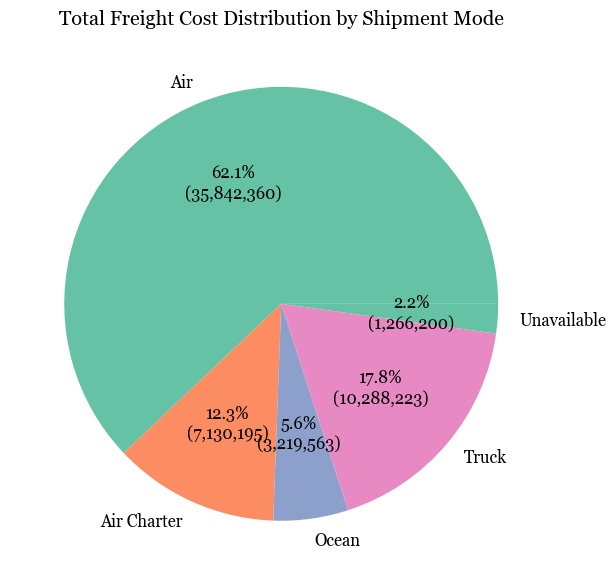

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the shipment data

# Assuming df is your DataFrame with the shipment data
# Extract relevant columns
shipment_data = df[['shipment mode', 'freight cost (usd)', 'days between scheduled and delivered']]

# Calculate total cost for each shipment mode
total_costs = shipment_data.groupby('shipment mode')['freight cost (usd)'].sum()

# Define custom colors
colors_shipment = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Plotting the pie chart for shipment mode
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(total_costs, labels=total_costs.index, autopct=lambda pct: f'{pct:.1f}%\n({total_costs.sum() * pct / 100 :,.0f})', colors=colors_shipment)
plt.title('Total Freight Cost Distribution by Shipment Mode')

plt.tight_layout()
plt.show()



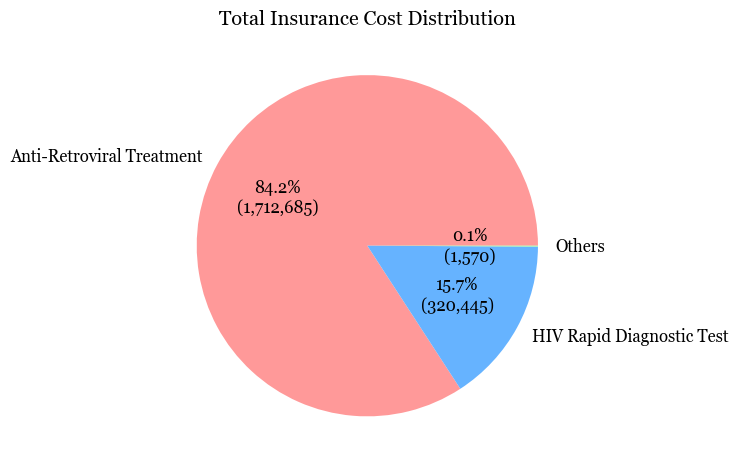

In [153]:
# Assuming df is your DataFrame with the shipment data
# Extract relevant columns
shipment_data = df[['product group', 'line item insurance (usd)', 'freight cost (usd)', 'pack price']]

# Filter data for "Anti-Retroviral Treatment" and "HIV Rapid Diagnostic Test" product groups
filtered_data = shipment_data[shipment_data['product group'].isin(['Anti-Retroviral Treatment', 'HIV Rapid Diagnostic Test'])]

# Calculate total insurance cost for "Anti-Retroviral Treatment" and "HIV Rapid Diagnostic Test"
insurance_costs = filtered_data.groupby('product group')['line item insurance (usd)'].sum()

# Calculate total insurance cost for other product groups
other_insurance_cost = shipment_data[~shipment_data['product group'].isin(['Anti-Retroviral Treatment', 'HIV Rapid Diagnostic Test'])]['line item insurance (usd)'].sum()

# Append other product groups as one category
insurance_costs['Others'] = other_insurance_cost

# Define custom colors
colors_product = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting the pie chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(insurance_costs, labels=insurance_costs.index, autopct=lambda pct: f'{pct:.1f}%\n({insurance_costs.sum() * pct / 100 :,.0f})', colors=colors_product)
plt.title('Total Insurance Cost Distribution')

plt.tight_layout()
plt.show()

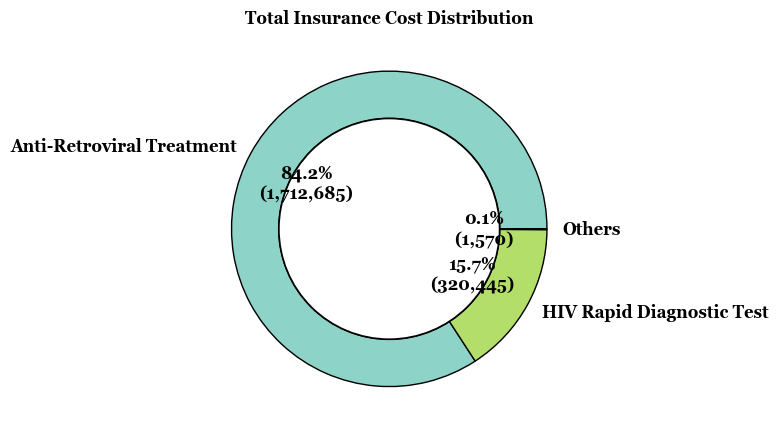

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the shipment data
# Your provided code goes here ...

# Continue with the provided code to get the 'insurance_costs' DataFrame

# Load the Set3 colormap
set3 = plt.cm.get_cmap('Set3', insurance_costs.size).colors

# Plotting the pie chart with the requested modifications
plt.figure(figsize=(12, 6), facecolor=(0, 0, 0, 0))  # Transparent figure background
plt.subplot(1, 2, 1)

wedges, texts, autotexts = plt.pie(insurance_costs, labels=insurance_costs.index, autopct=lambda pct: f'{pct:.1f}%\n({insurance_costs.sum() * pct / 100 :,.0f})', colors=set3, wedgeprops=dict(width=0.3, edgecolor='black'))

# Set font to Georgia, bold, and increase size
georgia_font = {'fontname': 'Georgia', 'fontweight': 'bold', 'fontsize': 12}
plt.title('Total Insurance Cost Distribution', **georgia_font)

# Applying font settings to all text elements
for text in texts + autotexts:
    text.set_fontweight('bold')
    text.set_fontname('Georgia')
    text.set_fontsize(12)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white', linewidth=1.25, edgecolor='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

# Save the figure with full transparency
plt.savefig('/Users/USER/Downloads/Scripting Images/baa.png', transparent=True, bbox_inches='tight', pad_inches=0, dpi=300, format='png')
plt.show()

# This code will produce a PNG file that you can download from the provided path.


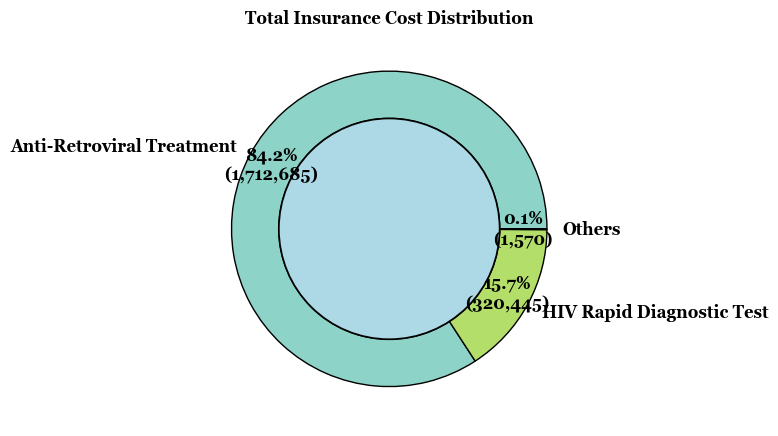

In [158]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the shipment data
# Your provided code goes here ...

# Continue with the provided code to get the 'insurance_costs' DataFrame

# Load the Set3 colormap
set3 = plt.cm.get_cmap('Set3', insurance_costs.size).colors

# Plotting the pie chart with the requested modifications
plt.figure(figsize=(12, 6), facecolor=(0, 0, 0, 0))  # Transparent figure background
plt.subplot(1, 2, 1)

# Set the position of the percentage labels closer to the slice labels
pctdistance = 0.85  # You can adjust this value as needed to move the text closer or further

wedges, texts, autotexts = plt.pie(insurance_costs, labels=insurance_costs.index, autopct=lambda pct: f'{pct:.1f}%\n({insurance_costs.sum() * pct / 100 :,.0f})', colors=set3, pctdistance=pctdistance, wedgeprops=dict(width=0.3, edgecolor='black'))

# Set font to Georgia, bold, and increase size
georgia_font = {'fontname': 'Georgia', 'fontweight': 'bold', 'fontsize': 12}
plt.title('Total Insurance Cost Distribution', **georgia_font)

# Applying font settings to all text elements
for text in texts + autotexts:
    text.set_fontweight('bold')
    text.set_fontname('Georgia')
    text.set_fontsize(12)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='lightblue', linewidth=1.25, edgecolor='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

# Save the figure with full transparency
plt.savefig('/Users/USER/Downloads/Scripting Images/baa.png', transparent=True, bbox_inches='tight', pad_inches=0, dpi=300, format='png')
plt.show()

# This code will produce a PNG file that you can download from the provided path.


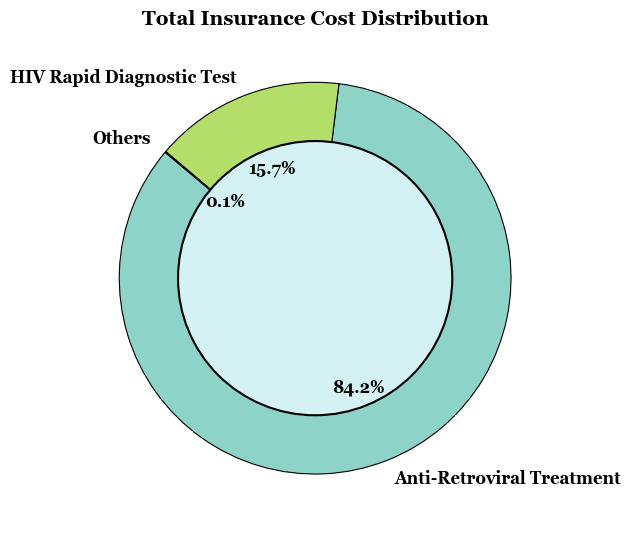

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the shipment data
# Your provided code for extracting and processing data goes here...

# Continue with the provided code to get the 'insurance_costs' DataFrame

# Load the Set3 colormap
set3 = plt.cm.get_cmap('Set3', len(insurance_costs)).colors

# Plotting the pie chart with modifications
plt.figure(figsize=(12, 6), facecolor=(0, 0, 0, 0))  # Transparent figure background
plt.subplot(1, 2, 1)

# Create the pie chart with the Set3 color scheme
wedges, texts, autotexts = plt.pie(insurance_costs, labels=insurance_costs.index, autopct='%1.1f%%', colors=set3, 
                                   startangle=140, wedgeprops=dict(linewidth=0.8, edgecolor='black'))

# Setting font properties for all text to bold and Georgia
plt.rcParams['font.size'] = 12  # You can adjust the font size here
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.family'] = 'Georgia'
plt.title('Total Insurance Cost Distribution', fontweight='bold')

# Applying font settings to all text elements
for text in texts + autotexts:
    text.set_fontweight('bold')
    text.set_fontname('Georgia')

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70, fc='#D4F1F4', linewidth=1.5, edgecolor='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

# Save the figure with full transparency
plt.savefig('/Users/USER/Downloads/Scripting Images/abaa.png', transparent=True, bbox_inches='tight', pad_inches=0, dpi=300, format='png')
plt.show()

# This code will produce a PNG file that you can download from the provided path.


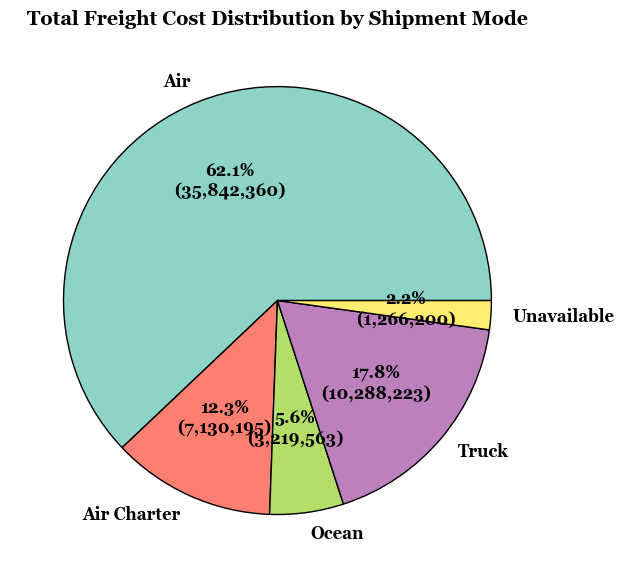

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the shipment data
# Extract relevant columns
shipment_data = df[['shipment mode', 'freight cost (usd)', 'days between scheduled and delivered']]

# Calculate total cost for each shipment mode
total_costs = shipment_data.groupby('shipment mode')['freight cost (usd)'].sum()

# Load the Set3 colormap
set3 = plt.cm.get_cmap('Set3', len(total_costs)).colors

# Plotting the pie chart for shipment mode
plt.figure(figsize=(12, 6), facecolor=(0, 0, 0, 0))  # Transparent figure background
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(total_costs, labels=total_costs.index, autopct=lambda pct: f'{pct:.1f}%\n({total_costs.sum() * pct / 100 :,.0f})', colors=set3, 
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

# Setting font properties for all text to Georgia and bold
plt.rcParams['font.family'] = 'Georgia'
plt.rcParams['font.weight'] = 'bold'
plt.title('Total Freight Cost Distribution by Shipment Mode', fontweight='bold', fontsize=14)

# Apply font settings to labels and percentages
for text in texts + autotexts:
    text.set_fontweight('bold')
    text.set_fontname('Georgia')
    text.set_fontsize(12)  # Adjust size as needed

plt.tight_layout()

# Save the figure with full transparency
plt.savefig('/Users/USER/Downloads/Scripting Images/abaasaa.png', transparent=True, bbox_inches='tight', pad_inches=0, dpi=300, format='png')
plt.show()

# This code will produce a PNG file that you can download from the provided path.
